<font size="6">Рекуррентные нейронные сети (RNN)</font>

#  Особенности рекуррентных нейронных сетей

До этого мы работали с методами машинного обучения, которые работают с признаковым описанием **фиксированной длины**.

Так правильно делать в случае **табличных данных** — обычно каждый объект в таблицах описан фиксированным набором признаков, и новые признаки не могут появиться "вдруг". Мы точно знаем, что на вход нам приходит объект размера 100, а на выходе мы должны для него предсказать 1 число.

Верно это и про **изображения** — обычно нейронная сеть учится на изображениях определенного разрешения. Да, мы можем сделать нейросеть, которая способна работать с изображением почти любого разрешения, но добиваемся мы этого за счет вставки слоев **global pooling**, которые  приводят признаковое описание, полученное сверточную частью нейросети, к фиксированному размеру.

Однако многие данные структурой фиксированной длины не обладают. К примеру, **тексты**. Возьмем все абзацы из "Войны и Мира". Какие-то будут больше, какие-то меньше. И обрезать их как-то нельзя. Аналогично будет и для текстов из Твиттера. И что делать, если мы хотим предсказывать, например, эмоциональную окрашенность текста?

Или если на основе абзаца текста нам необходимо сгенерировать его **краткое содержание**? То, что нужно предсказать, может быть разной длины. Аналогичный вопрос возникает также в случае, если мы хотим по данным о курсе валюты за прошлый год спрогнозировать **курс валюты на следующий месяц** по дням.

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/time_series_data.png" width="700">

Существует ряд задач, для которых необходима особая структура нейронной сети, позволяющая **принимать данные разного размера**.


## Примеры задач

**Анализ временных рядов**
- Табличные данные
- Аннотирование изображений и видео (Image/Video captioning)
- Машинный перевод
- Распознавание текста
- Распознавание речи


**Генеративные модели**
- Генерация текста/речи (например, чат-боты)
- Генерация изображений

**Классификация**
- Изображения
- Блоки текста (Sentiment analysis)

**Анализ последовательностей**
- Анализ текстов
- Биологические последовательности
- Химические последовательности


Общее для задач — мы имеем возможность сохранять информацию, сформированную при обработке одной части объекта (**токена**), и использовать ее, когда мы анализируем другие части.

До прихода нейронных сетей предложения пытались описать при помощи набора правил — грамматик, которые довольно успешно могли генерировать новые осмысленные предложения. Так выглядит разбор при помощи грамматик простого предложения


<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/parse_tree.png" width="500">

Увы, грамматики плохо учитывали высокоуровневые связи. Например, очень тяжело было добиться того, чтобы в абзаце текста:

"Леша пришел домой. Он будет есть рыбу."

компьютер понял, что во втором предложении "Он" соответствует "Леше".


**Основная идея**, на которой основано RNN, состоит в следующем: взять всю последовательность и пропустить через одну и ту же нейросеть.
Но при этом сама нейросеть кроме следующего элемента последовательности (например, слова в тексте), будет принимать еще один параметр — некий $h$, который в начале будет, например, вектором из нулей, а далее — значением, которое выдает сама нейросеть после обработки очередного элемента последовательности (**токена**).

Также далее мы будем использовать понятие **нулевого токена** — токена, который символизирует заплатку, токен, не несущий никакого смысла, но который иногда нужно передать модели. Например, как сигнал начала работы.

В сети появляется новая сущность — **hidden state** ($h$) — вектор, хранящий состояние, учитывающее и локальный, и глобальный контекст.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/rnn_idea.png" width="800"></center>

<center><em>Source: <a href="https://en.wikipedia.org/wiki/Recurrent_neural_network">Recurrent neural network</a></em></center>

При этом наша нейросеть может выдавать некий ответ на каждом шаге, но мы можем:

 1. Использовать только выданный на последнем (если нам нужно предсказать одно значение) — **many-to-one**.

 2. Мы можем подавать в наше нейросетку токены (когда кончился исходный сигнал, подаем нулевые токены), пока она не сгенерирует токен, символизирующий остановку (**many-to-many, one-to-many**).

 3. Можем делать различные комбинации, игнорируя часть выходов нейросети в начале её работы.

*   **«One to one»** — обычная нейронная сеть, не обязательно применять RNN в таком случае.

*   Более сложной является реализация **«one to many»**, когда у нас есть всего один вход, и нам необходимо сформировать несколько выходов. Такой тип нейронной сети актуален, когда мы говорим о **генерации музыки** или **текстов**. Мы задаем начальное слово или начальный звук, а дальше модель начинает самостоятельно генерировать выходы, в качестве входа к очередной ячейке рассматривая выход с прошлой ячейки нейронной сети.

*   Если мы рассматриваем задачу **классификации**, то актуальна схема **«many to one»**. Мы должны проанализировать все входы нейронной сети и только в конце определиться с классом.

*   Схема **«many to many»**, в которой количество выходов **равно** количеству входов нейронной сети. Обычно это задачи типа разметки исходной последовательности. Например, указать столицы городов, названия важных объектов, веществ и т.д., что относится к задачам вида NER (Named entity recogition).

*   Схема **«many to many»**, в которой количество выходов нейронной сети **не равно** количеству входов. Это актуально в машинном переводе, когда одна и та же фраза может иметь разное количество слов в разных языках (т.е. это реализует схему кодировщик-декодировщик). Кодировщик получает данные различной длины — например, предложение на английском языке. С помощью скрытых состояний он формирует из исходных данных вектор, который затем передаётся в декодировщик. Последний, в свою очередь, генерирует из полученного вектора выходные данные — исходную фразу, переведённую на другой язык.

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/one_or_many_to_one_or_many_ways.png" width="1000">

Можно объединять разные подходы. Сначала генерируем некий $h$, который содержит сжатую информацию о том, что было подано в нейросеть, а затем подаем его в нейросеть «one to many», которая генерирует, к примеру, перевод того текста, что был подан первой части нейросети.

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/sequence_to_sequence.png" width="900">

# Базовый RNN блок

Рассмотрим работу рекуррентной нейронной сети:
1. На вход поступает некоторая последовательность $x = \{x_1,...x_t,...,x_n\}$, где $x_i$ — вектор фиксированной размерности. В ряде случаев этот вектор имеет размерность 1.

2. Для каждого поступившего $x_t$ формируем скрытое состояние $h_t$, которое является функцией от предыдущего состояния $h_{t-1}$ и текущего элемента последовательности $x_t$:
$$\large h_t = f_W(h_{t-1}, x_t),$$
где $W$  — это обучаемые параметры (веса).

3. На основании рассчитанного скрытого состояния, учитывающего предыдущие значения  $x_i$, формируется выходная последовательность $y = \{y_1,...y_t,...,y_k\}$. Для формирования предсказания $y_t$ в текущий момент времени в модель могут быть добавлены полносвязные слои, принимающие на вход текущее скрытое состояние $h_t$.

Ниже представлена простая RNN. В качестве функции активации используется тангенс.

Мы можем обрабатывать последовательность элементов вектора $x$ за счет применения рекуррентной формулы на каждом шаге:

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/rnn_basic_block.png" width="700">


Состояние состоит из вектора $h$, называемого скрытым состоянием:

$\large h_t = f_W(h_{t-1}, x_t),$

$\large \quad \quad \quad \color{grey}{\downarrow \text{(также может добавляться bias)}}$

$\large h_t = tanh(W_{hh}h_{t-1} + W_{xh}x_t).$

$\large y_t = W_{hy}h_t.$

**Отличие** от слоев, с которыми мы уже сталкивались, состоит в том, что **на выходе мы получаем два объекта**: $y_t$ и $h_t$:

$y_t$ — предсказание в текущий момент времени, например, метка класса,

$h_t$ — контекст, в котором предсказание было сделано. Он может использоваться для дальнейших предсказаний.

## RNNCell

В PyTorch для вычисления $h_t$ используется модуль [RNNCell](https://pytorch.org/docs/stable/generated/torch.nn.RNNCell.html)

$y_t$ в нем не вычисляется: предполагается, что для его получения в модель должен быть добавлен дополнительный линейный слой.

**`input_size`** — размер элемента последовательности.

В отличие от сверточных слоёв, это всегда вектор, а не тензор, поэтому **`input_size`** — скаляр.

**`hidden_size`** — тоже скаляр. Он задает размер скрытого состояния, которое тоже является вектором. Фактически это количество нейронов в слое.


In [ ]:
import torch

rnn_cell = torch.nn.RNNCell(input_size=3, hidden_size=2)
dummy_sequence = torch.randn((1, 3))  # batch, input_size
h = rnn_cell(dummy_sequence)
print("Inital shape:".ljust(17), f"{dummy_sequence.shape}")
print("Resulting shape:".ljust(17), f"{h.shape}")  # hidden state

Inital shape:     torch.Size([1, 3])
Resulting shape:  torch.Size([1, 2])


Внутри происходит примерно то, что описано в коде ниже.
Для понятности в данном примере опущена батчевая обработка. Также для того, чтобы подобный код корректно заработал, [необходимо обернуть веса](https://stackoverflow.com/questions/50935345/understanding-torch-nn-parameter) в `torch.nn.Parameter` для регистрации параметров в модели.

Начальное значение может быть инициализировано нулями, но лучше инициализировать случайными значениями, чтобы нейросеть хоть как-то меняла своё поведение. Или даже чем-то осмысленным.

In [ ]:
from torch import nn


# Simple RNNcell without a bias and batch support
class SimplifiedRNNCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        # Init weight matrix, for simplicity omit bias
        self.W_hx = (
            torch.randn(input_size, hidden_size) * 0.0001
        )  # hidden_size == number of neurons
        self.W_hh = (
            torch.randn(hidden_size, hidden_size) * 0.0001
        )  # naive initialization
        self.h0 = torch.zeros((hidden_size))  # Initial hidden state

    def forward(self, x, h=None):  # Without a batch dimension
        if h is None:
            h = self.h0
        h = torch.tanh(torch.matmul(self.W_hx.T, x) + torch.matmul(self.W_hh.T, h))
        return h


simple_rnn_cell = SimplifiedRNNCell(input_size=3, hidden_size=2)
h = simple_rnn_cell(dummy_sequence[0])  # No batch
print(f"Out = h\n{h.shape} \n{h}")

Out = h
torch.Size([2]) 
tensor([-2.2494e-04,  1.6840e-05])


Однако в последовательности всегда **несколько элементов**. И надо применить алгоритм к каждому.


Поэтому RNNCell напрямую не используется. Для него есть обертка — [RNN](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html), которая обеспечивает последовательный вызов RNNCell для всех элементов последовательности.

### RNN блок в PyTorch

**Warning: формат данных для RNN: длина последовательности, батч, размер объекта**

In [ ]:
rnn = torch.nn.RNN(input_size=3, hidden_size=2)  # batch_first = True
dummy_batched_seq = torch.randn((2, 1, 3))  # seq_len, batch, input_size
out, h = rnn(dummy_batched_seq)

print("Inital shape:".ljust(20), f"{dummy_batched_seq.shape}")
print("Resulting shape:".ljust(20), f"{out.shape}")
print("Hidden state shape:".ljust(20), f"{h.shape}")

Inital shape:        torch.Size([2, 1, 3])
Resulting shape:     torch.Size([2, 1, 2])
Hidden state shape:  torch.Size([1, 1, 2])


Внутри происходит примерно следующее:

In [ ]:
import numpy as np


# Simple RNN without batching
class SimplifiedRNNLayer(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.rnn_cell = SimplifiedRNNCell(input_size, hidden_size)

    # Without a batch dimension x have shape seq_len * input_size
    def forward(self, x, h=None):
        all_h = []
        for i in range(x.shape[0]):  # iterating over timestamps
            h = self.rnn_cell(torch.Tensor(x[i]), h)
            all_h.append(h)
        return np.stack(all_h), h


simple_rnn = SimplifiedRNNLayer(input_size=4, hidden_size=2)
sequence = np.array(
    [[0, 1, 2, 0], [3, 4, 5, 0]]
)  # batch with one sequence of two elements

out, h = simple_rnn(sequence)
print("Inital shape:".ljust(20), f"{sequence.shape}")
print("Resulting shape:".ljust(20), f"{out.shape}")
print("Hidden state shape:".ljust(20), f"{h.shape}")

Inital shape:        (2, 4)
Resulting shape:     (2, 2)
Hidden state shape:  torch.Size([2])


Давайте разберемся.

Если у нас есть две последовательности:

*   [1, 3, 2]
*   [0, 4, 2]

Чтобы обработать элемент "3", нам нужен hidden state, вычисленный по "1".

То же самое для "4" — нужно обработать "0". Таким образом, по горизонтальной оси мы не можем паралелиться. Придётся параллелиться по вертикальной. Мы можем паралельно обработать первые элементы первой и второй последовательностей.

К данным добавляется еще одно измерение — **размер последовательности**. Batch из 5 последовательностей по 6 объектов (размер объекта 3) в каждой будет выглядеть так (время идёт первой размерностью, поэтому поэлементно идём "сверху вниз"):

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/rnn_batch.png" width="700">

<em>Source: <a href="https://www.researchgate.net/publication/284579100_Session-based_Recommendations_with_Recurrent_Neural_Networks">Session-based Recommendations with Recurrent Neural Networks</a></em>

Внутри RNN модуля элементы последовательности обрабатываются последовательно:

<img src = "https://edunet.kea.su/repo/EduNet-content/L08/out/simple_rnn_h_state.png" width="700">

Веса при этом используются одни и те же.

In [ ]:
dummy_seq = torch.randn((2, 1, 3))  #  seq_len, batch, input_size

print("RNNCell")
rnn_cell = torch.nn.RNNCell(3, 2)
print("Parameter".ljust(10), "Shape")
for t, p in rnn_cell.named_parameters():
    print(t.ljust(10), p.shape)

cell_out = rnn_cell(dummy_seq[0, :, :])  # take first element from sequence
print()
print("Result shape =".ljust(20), cell_out.shape)
print("Hidden state shape =".ljust(20), cell_out.shape)  # one hidden state

print("----------------------------------------")

print("RNN")
rnn = torch.nn.RNN(3, 2)
print("Parameter".ljust(15), "Shape")
for t, p in rnn.named_parameters():
    print(t.ljust(15), p.shape)

out, h = rnn(dummy_seq)

print()
print("Result shape =".ljust(20), out.shape)  # h for all timestamps element
print("Hidden state shape =".ljust(20), cell_out.shape)  # h for last element

RNNCell
Parameter  Shape
weight_ih  torch.Size([2, 3])
weight_hh  torch.Size([2, 2])
bias_ih    torch.Size([2])
bias_hh    torch.Size([2])

Result shape =       torch.Size([1, 2])
Hidden state shape = torch.Size([1, 2])
----------------------------------------
RNN
Parameter       Shape
weight_ih_l0    torch.Size([2, 3])
weight_hh_l0    torch.Size([2, 2])
bias_ih_l0      torch.Size([2])
bias_hh_l0      torch.Size([2])

Result shape =       torch.Size([2, 1, 2])
Hidden state shape = torch.Size([1, 2])


Давайте обратимся к [документации PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html) и посмотрим, какие параметры есть у модуля RNN.

### Слои (Stacked RNNs)

RNN блоки можно объединять в слои, накладывая их друг на друга. Для этой операции в `torch.nn.RNN` есть аргумент `num_layers`, с помощью которого можно указать количество слоёв.

В представленной архитектуре нижний слой (а это всё ещё одна RNN-ячейка) обрабатывает букву *h*, передаёт свой hidden state в саму себя (направо, `h[0]`) и обрабатывает *е* и т.д. Кроме того, эта же ячейка передаёт своё состояние на вторую RNN-ячейку (наверх, `h[1]`), которая уже обрабатывает результат работы первой ячейки.

На практике такая схема может приводить к взрыву или затуханию градиента, причём при проходе как по горизонтали, так и по вертикали. Об этом ниже.

<img src ="http://edunet.kea.su/repo/EduNet-content/L08/out/layers.png" width="600">

Параметр **num_layers** задаёт количество RNN-ячеек.

In [ ]:
dummy_input = torch.randn((2, 1, 3))  # seq_len, batch, input_size
rnn = torch.nn.RNN(3, 2, num_layers=3)

# Weights matrix sizes not changed!
for t, p in rnn.named_parameters():
    print(t, p.shape)

out, h = rnn(dummy_input)

print()
print("Out:\n", out.shape)  # Hidden states for all elements from top layer
print("h:\n", h.shape)  # Hidden states for last element for all layers

weight_ih_l0 torch.Size([2, 3])
weight_hh_l0 torch.Size([2, 2])
bias_ih_l0 torch.Size([2])
bias_hh_l0 torch.Size([2])
weight_ih_l1 torch.Size([2, 2])
weight_hh_l1 torch.Size([2, 2])
bias_ih_l1 torch.Size([2])
bias_hh_l1 torch.Size([2])
weight_ih_l2 torch.Size([2, 2])
weight_hh_l2 torch.Size([2, 2])
bias_ih_l2 torch.Size([2])
bias_hh_l2 torch.Size([2])

Out:
 torch.Size([2, 1, 2])
h:
 torch.Size([3, 1, 2])


### Bidirectional

Последовательность можно пропустить через сеть два раза: в прямом и обратном направлении. Для этого создаётся слой, аналогичный входному, для обратного направления, и результат двух слоёв конкатенируется.

[A Beginner’s Guide on Recurrent Neural Networks with PyTorch](https://blog.floydhub.com/a-beginners-guide-on-recurrent-neural-networks-with-pytorch/)

<img src ="http://edunet.kea.su/repo/EduNet-content/L08/out/bidirectional.png" width="700">

In [ ]:
dummy_input = torch.randn((2, 1, 3))  # seq_len, batch, input_size
rnn = torch.nn.RNN(3, 2, bidirectional=True)

for t, p in rnn.named_parameters():
    print(t, p.shape)

out, h = rnn(dummy_input)

print()
print("Out:\n", out.shape)  # Concatenated Hidden states from both layers
print(
    "h:\n", h.shape
)  # Hidden states last element from  both : 2*num_layers*hidden_state

weight_ih_l0 torch.Size([2, 3])
weight_hh_l0 torch.Size([2, 2])
bias_ih_l0 torch.Size([2])
bias_hh_l0 torch.Size([2])
weight_ih_l0_reverse torch.Size([2, 3])
weight_hh_l0_reverse torch.Size([2, 2])
bias_ih_l0_reverse torch.Size([2])
bias_hh_l0_reverse torch.Size([2])

Out:
 torch.Size([2, 1, 4])
h:
 torch.Size([2, 1, 2])


# Пример прогнозирования временного ряда

---
- [How to Remove Non-Stationarity From Time Series](https://www.kaggle.com/code/bextuychiev/how-to-remove-non-stationarity-from-time-series)
- [A Guide to Time Series Forecasting in Python](https://builtin.com/data-science/time-series-forecasting-python)
- [How to Check if Time Series Data is Stationary with Python?](https://www.geeksforgeeks.org/how-to-check-if-time-series-data-is-stationary-with-python/)
- [Complete Guide on Time Series Analysis in Python](https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python)
- [Data transformations and forecasting models: what to use and when](https://people.duke.edu/~rnau/whatuse.htm)

Что общего у прогнозирования потребления электроэнергии домохозяйствами, оценки трафика на дорогах в определенные периоды, прогнозировании паводков и прогнозировании цены, по которой акции будут торговаться на фондовой бирже?

Все они попадают под понятие данных временных рядов! Вы не можете точно предсказать любой из этих результатов без компонента «время». И по мере того, как в мире вокруг нас генерируется все больше и больше данных, прогнозирование временных рядов становится все более важной областью применения методов ML и DL.



## Подготовка данных
[Time Series Prediction with LSTM Using PyTorch](https://colab.research.google.com/github/dlmacedo/starter-academic/blob/master/content/courses/deeplearning/notebooks/pytorch/Time_Series_Prediction_with_LSTM_Using_PyTorch.ipynb#scrollTo=NabsV8O5BBd5)


### Загрузка данных

Данные о количестве пассажиров за каждый месяц.
[Dataset Air Passengers Number of air passengers per month](https://www.kaggle.com/rakannimer/air-passengers)


In [ ]:
import pandas as pd

dataset = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/airline-passengers.csv"
)
dataset.head()

Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121

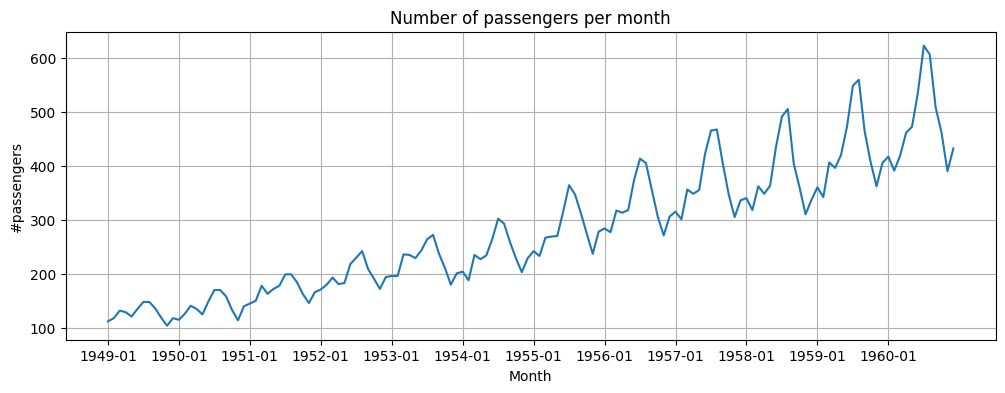

In [ ]:
import matplotlib.pyplot as plt

training_data = dataset.iloc[:, 1:2].values  # transform dataframe to numpy.array
# plotting
plt.figure(figsize=(12, 4))
plt.plot(training_data, label="Airline Passangers Data")
plt.title("Number of passengers per month")
plt.ylabel("#passengers")
plt.xlabel("Month")
labels_to_display = [i for i in range(training_data.shape[0]) if i % 12 == 0]
plt.xticks(labels_to_display, dataset["Month"][labels_to_display])
plt.grid()
plt.show()

Обратите внимание на разбиение временного ряда на **train-val-test**.

Если мы поделим ряд на отрезки, точки склейки будут легко предсказываться либо предыдущим, либо средним значением по отрезку. Нужно предсказывать крупные отрезки ряда. И помнить о том, что перемешивать данные нельзя — есть "прошлое" и "будущее".


<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/fixed_partitioning.jpg" width="700">

<em>Source: <a href="https://yuting3656.github.io/yutingblog/coursera-tensorflow-developer-professional-certificate/sequences-time-series-and-prediction/week01-03">Coursera: Sequences, Time Series and Prediction with TensorFlow</a></em>

### Шкалирование данных

In [ ]:
# Min-Max normalization
td_min = training_data.min()
td_max = training_data.max()
print("Initial statistics:")
print("Minimum value:", repr(td_min).rjust(5))
print("Maximum value:", repr(td_max).rjust(5))

training_data = (training_data - td_min) / (td_max - td_min)
print("\nResulting statistics:")
print("Minimum value:", repr(training_data.min()).rjust(5))
print("Maximum value:", repr(training_data.max()).rjust(5))

Initial statistics:
Minimum value:   104
Maximum value:   622

Resulting statistics:
Minimum value:   0.0
Maximum value:   1.0


### Формирование ансамблей данных

Поскольку мы хотим научиться предсказывать следующие значение на основе предыдущих, нам нужно подготовить данные соответствующим образом.

Разобьем весь массив данных на фрагменты вида

$x \to y$,

где $x$ — это подпоследовательность, например, записи с 1-й по 8-ю, а $y$ — это значение из 9-й записи, то самое, которое мы хотим предсказать.

In [ ]:
import numpy as np
import torch

# create data "ensemble"


def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data) - seq_length):
        _x = data[i : (i + seq_length)]  # picking several sequential observations
        _y = data[i + seq_length]  # picking the subsequent observation
        x.append(_x)
        y.append(_y)

    return torch.Tensor(np.array(x)), torch.Tensor(np.array(y))


# set length of the ensemble; accuracy of the predictions and
# speed perfomance almost always depend on it size
seq_length = 8  # compare 2 and 32
x, y = sliding_windows(training_data, seq_length)
print("Example of the obtained data:\n")
print("Data corresponding to the first x:")
print(x[0])
print("Data corresponding to the first y:")
print(y[0])

Example of the obtained data:

Data corresponding to the first x:
tensor([[0.0154],
        [0.0270],
        [0.0541],
        [0.0483],
        [0.0328],
        [0.0598],
        [0.0849],
        [0.0849]])
Data corresponding to the first y:
tensor([0.0618])


Благодаря такому подходу мы можем работать с RNN моделью так же, как работали со сверточными моделями, подавая на вход такую подпоследовательность + результат.

### Разобьем на train и test

In [ ]:
train_size = int(len(y) * 0.8)

x_train = x[:train_size]
y_train = y[:train_size]

x_test = x[train_size:]
y_test = y[train_size:]

print("Train data:")
print("x shape:", x_train.shape)
print("y shape:", y_train.shape)

print("\nTest data:")
print("x shape:", x_test.shape)
print("y shape:", y_test.shape)

Train data:
x shape: torch.Size([108, 8, 1])
y shape: torch.Size([108, 1])

Test data:
x shape: torch.Size([28, 8, 1])
y shape: torch.Size([28, 1])


## Создание и обучение модели

Обратите внимание на параметр **batch_first**. Он позволяет записывать данные в привычном формате.

In [ ]:
import torch.nn as nn


class AirTrafficPredictor(nn.Module):
    def __init__(self, input_size, hidden_size):
        # hidden_size == number of neurons
        super().__init__()
        self.rnn = nn.RNN(
            input_size=input_size, hidden_size=hidden_size, batch_first=True
        )
        self.fc = nn.Linear(hidden_size, 1)  # Predict only one value

    def forward(self, x):
        # print("x: ",x.shape) # 108 x 8 x 1 : [batch_size, seq_len, input_size]
        out, h = self.rnn(x)
        # print("out: ", out.shape) # 108 x 8 x 4 : [batch_size, seq_len, hidden_size] Useless!
        # print("h : ", h.shape) # 1 x 108 x 4 [ num_layers, batch_size, hidden_size]
        y = self.fc(h)
        # print("y",y.shape) # 1 x 108 x 1
        return y, h

### Обучение

Благодаря подготовке данных процесс обучения не будет отличаться от того, что мы использовали на прошедших занятиях.

В силу того, что датасет маленький и все данные поместились в один batch, итерирования по batch-ам в явном виде здесь не происходит.

In [ ]:
def time_series_train(model, num_epochs=2000, learning_rate=0.01):
    criterion = torch.nn.MSELoss()  # mean-squared error for regression
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    for epoch in range(num_epochs):
        y_pred, h = model(x_train)  # we don't use h there, but we can!
        optimizer.zero_grad()

        # obtain the loss
        loss = criterion(y_pred[0], y_train)  # for shape compatibility
        loss.backward()

        optimizer.step()
        if epoch % 100 == 0:
            print(f"Epoch: {epoch},".ljust(15), "loss: %1.5f" % (loss.item()))


print("Simple RNN training process with MSE loss:")
input_size = 1
hidden_size = 4
rnn = AirTrafficPredictor(input_size, hidden_size)
time_series_train(rnn)

Simple RNN training process with MSE loss:
Epoch: 0,       loss: 0.49864
Epoch: 100,     loss: 0.00477
Epoch: 200,     loss: 0.00313
Epoch: 300,     loss: 0.00301
Epoch: 400,     loss: 0.00289
Epoch: 500,     loss: 0.00278
Epoch: 600,     loss: 0.00268
Epoch: 700,     loss: 0.00260
Epoch: 800,     loss: 0.00254
Epoch: 900,     loss: 0.00249
Epoch: 1000,    loss: 0.00246
Epoch: 1100,    loss: 0.00244
Epoch: 1200,    loss: 0.00242
Epoch: 1300,    loss: 0.00241
Epoch: 1400,    loss: 0.00241
Epoch: 1500,    loss: 0.00241
Epoch: 1600,    loss: 0.00240
Epoch: 1700,    loss: 0.00240
Epoch: 1800,    loss: 0.00240
Epoch: 1900,    loss: 0.00240


### Тестирование

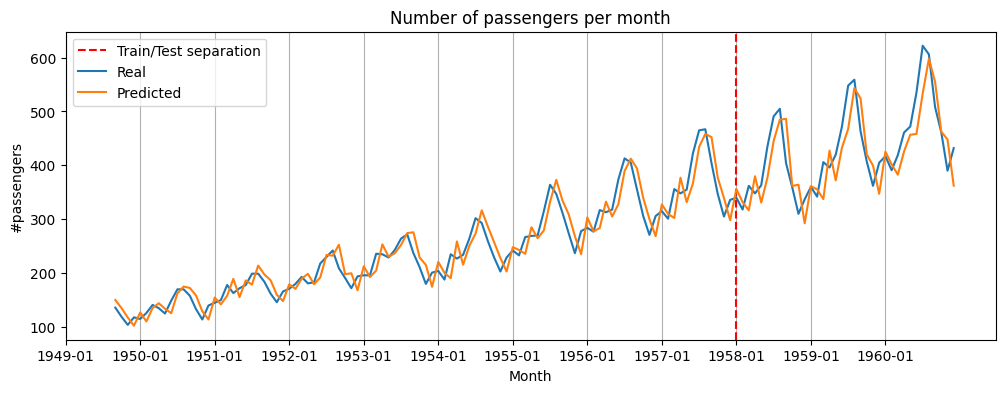

In [ ]:
def time_series_plot(train_predict):
    data_predict = train_predict.data
    y_data_plot = y.data

    # Denormalize
    data_predict = data_predict[0] * (td_max - td_min) + td_min
    y_data_plot = y_data_plot * (td_max - td_min) + td_min

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.axvline(x=train_size, c="r", linestyle="--")
    # shifting the curve as first y-value not correspond first value overall
    plt.plot(seq_length + np.arange(y_data_plot.shape[0]), y_data_plot)
    plt.plot(seq_length + np.arange(y_data_plot.shape[0]), data_predict)

    plt.title("Number of passengers per month")
    plt.ylabel("#passengers")
    plt.xlabel("Month")
    plt.xticks(labels_to_display, dataset["Month"][labels_to_display])

    plt.legend(["Train/Test separation", "Real", "Predicted"])
    plt.grid(axis="x")
    plt.show()


rnn.eval()
train_predict, h = rnn(x)
time_series_plot(train_predict)

Видим, что модель в принципе справляется с задачей. Если подбирать размер hidden size, качество станет лучше. Или мы добьёмся того, что нейросеть будет предсказывать просто линию (большой hidden size — нейросеть выучивает, что нужно предсказывать следующее значение по предыщущему).

Но посмотрим, как далее справятся более мощные архитектуры, и уже позднее напишем окончательные выводы.



### Проблемы RNN

Теоретически, можно было бы сразу пропустить все данные через сеть и затем вычислить градиент, однако возникнут следующие проблемы:

 - большие последовательности не поместятся в памяти;
 - так как цепочка будет очень длинной, возникнет затухание/взрыв градиента;
 - по мере прохождения сигнала по цепи контекст затирается.


Допустим, у нас есть длинная последовательность. Если мы сразу предсказываем, то в каждый момент времени нужно распространить Loss. И все ячейки нужно обновить во время backpropogation. Все градиенты нужно посчитать. Возникают проблемы, связанные с нехваткой памяти.

Есть специальные тесты для проверки, контекст какой длины использует RNN при предсказании. Если мы делаем предсказание только в последней ячейке, может оказаться, что используется, скажем, информация только о последних 10 словах предложения.

Функция активации Tanh постепенно затирает контекст.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/backprop_through_time.png"><center>

<center><em>Source: <a href="http://cs231n.stanford.edu/slides/2021/lecture_10.pdf">CS231n: Recurrent Neural Network</a></em></center>

Затухающий/взрывающийся градиент (Vanishing/exploding gradient) — явления затухающего и взрывающегося градиента часто встречаются в контексте RNN. И при большой длине последовательности это становится критичным. Причина в том, что зависимость величины градиента от числа слоёв экспоненциальная, поскольку веса умножаются многократно.

$dL ∝ (W)^N$.

$W > 1$ => взрыв

$W < 1$ => затухание

<img src ="http://edunet.kea.su/repo/EduNet-content/L08/out/simple_rnn_backprop.png" width="1000">

Один из путей решения проблемы: **градиентное отсечение** (Gradient clipping) — метод, который ограничивает максимально допустимое значение градиента, позволяя избежать градиентного взрыва.

А от затухания градиента может помочь **пропускание** **градиента по частям**, на сколько-то шагов по времени назад или вперёд. А не через всю нейросеть. Да, градиент будет не совсем точо считаться, и мы будем терять в качестве. И это нам спасает память.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/truncated_backprop.png"></center>

<center><em>Source: <a href="http://cs231n.stanford.edu/slides/2021/lecture_10.pdf">CS231n: Recurrent Neural Network</a></em></center>

# LSTM



Обычная RNN имела множество проблем, в том числе, в ней очень быстро затухала информация о предыдущих словах в предложении. Помимо этого были проблемы с затуханием/взрывом самого градиента.

Эти проблемы были частично решены в LSTM, предложенной в [Hochreiter & Schmidhuber (1997)](http://www.bioinf.jku.at/publications/older/2604.pdf)

В обычной RNN в ячейке был только один путь передачи информации. На каждом шаге мы сливали информацию, накопленную с предыдущих шагов, с текущей:

<img src = "https://edunet.kea.su/repo/EduNet-content/L08/out/simple_rnn_h_state.png" width="700">

При этом информация о предыдущих токенах очень быстро затухает, и теряется общая информация о предложении.

Структура ячейки LSTM намного сложнее. Здесь есть целых 4 линейных слоя, каждый из которых выполняет разные задачи.

<img src="https://edunet.kea.su/repo/EduNet-content/L08/out/lstm_chain.png" width="700">

<img src="https://edunet.kea.su/repo/EduNet-content/L08/out/lstm_chain_notation.png" width="700">

$\large f_t = σ(W_f \cdot [h_{t-1}, x_t] + b_f) - forget \quad gate$

$\large i_t = σ(W_i \cdot [h_{t-1}, x_t] + b_i) - input \quad gate$

$\large C^\prime_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_{C^\prime}) - candidate \quad cell \quad state$

$\large C_t = f_t\otimes C_{t-1} + i_t \otimes C^\prime_t - cell \quad state$

$\large o_t = σ(W_o \cdot [h_{t-1}, x_t] + b_o) - output \quad gate$

$\large h_t = o_t\otimes \tanh(C_t) - block \quad output$


Главное нововведение: в LSTM добавлен путь $c$, который по задумке должен этот общий контекст сохранять.

<img src="https://edunet.kea.su/repo/EduNet-content/L08/out/lstm_c_state_highway.png" width="500">

Другими словами, путь $c$ (cell state, иногда называется highway, магистраль)  помогает нейросети сохранять важную информацию, встретившуюся в какой-то момент в предложении, все время, пока эта информация требуется.

По формулам также видно, как возросла сложность.

**Vanilla RNN:**

$\large h_t = tanh \begin{pmatrix} W \begin{pmatrix} h_{t-1}\\ x_t \end {pmatrix}\end{pmatrix}$

**LSTM:**

$\large \begin{pmatrix} i\\ f\\ o\\ g \end{pmatrix} = \begin{pmatrix} \sigma \\ \sigma \\ \sigma \\ \tanh \end{pmatrix} W \begin{pmatrix} h_{t-1}\\ x_t \end{pmatrix}$

Два вектора на каждом временном промежутке:

$c_t = f \odot c_{t-1} + i \odot g$ — сell state

$h_t = o \odot tanh(c_t)$ — hidden state

## LSTMCell

[PyTorch LSTMCELL](https://pytorch.org/docs/stable/generated/torch.nn.LSTMCell.html)

Интерфейс отличается от RNNCell количеством входов и выходов.

In [ ]:
import torch

lstm_cell = torch.nn.LSTMCell(input_size=3, hidden_size=4)
input = torch.randn(1, 3)  # batch, input_size
h_0 = torch.randn(1, 4)
c_0 = torch.randn(1, 4)
h, c = lstm_cell(input, (h_0, c_0))  # second arg is tuple
print("Shape of h:", h.shape)  # batch, hidden_size
print("Shape of c:", c.shape)  # batch, hidden_size

Shape of h: torch.Size([1, 4])
Shape of c: torch.Size([1, 4])


## LSTM in PyTorch

Отличие от RNN состоит в том, что кроме $h$ возвращается еще и $c$.

In [ ]:
import torch.nn as nn

lstm = nn.LSTM(input_size=4, hidden_size=5)
input = torch.randn(3, 2, 4)  # seq_len, batch, input_size
out, (h, c) = lstm(input)  # h and c returned in tuple

print("Input shape:".ljust(15), input.shape)
print("Shape of h".ljust(15), h.shape)  # batch, hidden_size
print("Shape of c".ljust(15), c.shape)  # batch, hidden_size
print(
    "Output shape:".ljust(15), out.shape
)  # seq_len, batch, hidden_size : h for each element

Input shape:    torch.Size([3, 2, 4])
Shape of h      torch.Size([1, 2, 5])
Shape of c      torch.Size([1, 2, 5])
Output shape:   torch.Size([3, 2, 5])


### Пример использования на задаче с временным рядом

Чтобы убедиться в работоспособности конструкции, заменим RNN блок на LSTM в задаче предсказания временного ряда.

In [ ]:
import pandas as pd

dataset = pd.read_csv(
    "https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/airline-passengers.csv"
)
dataset.head()

Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121

In [ ]:
# Min-Max normalization
training_data = dataset.iloc[:, 1:2].values
td_min = training_data.min()
td_max = training_data.max()
print("Initial statistics:")
print("Minimum value:", repr(td_min).rjust(5))
print("Maximum value:", repr(td_max).rjust(5))

training_data = (training_data - td_min) / (td_max - td_min)
print("\nResulting statistics:")
print("Minimum value:", repr(training_data.min()).rjust(5))
print("Maximum value:", repr(training_data.max()).rjust(5))

Initial statistics:
Minimum value:   104
Maximum value:   622

Resulting statistics:
Minimum value:   0.0
Maximum value:   1.0


In [ ]:
import numpy as np

# create data "ensemble"


def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data) - seq_length):
        _x = data[i : (i + seq_length)]  # picking several sequential observations
        _y = data[i + seq_length]  # picking the subsequent observation
        x.append(_x)
        y.append(_y)

    return torch.Tensor(np.array(x)), torch.Tensor(np.array(y))


# set length of the ensemble; accuracy of the predictions and
# speed perfomance almost always depend on it size
seq_length = 8  # compare 2 and 32
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.8)

x_train = x[:train_size]
y_train = y[:train_size]

x_test = x[train_size:]
y_test = y[train_size:]

print("Train data:")
print("x shape:", x_train.shape)
print("y shape:", y_train.shape)

print("\nTest data:")
print("x shape:", x_test.shape)
print("y shape:", y_test.shape)

Train data:
x shape: torch.Size([108, 8, 1])
y shape: torch.Size([108, 1])

Test data:
x shape: torch.Size([28, 8, 1])
y shape: torch.Size([28, 1])


In [ ]:
def time_series_plot(train_predict):
    data_predict = train_predict.data
    y_data_plot = y.data

    # Denormalize
    data_predict = data_predict[0] * (td_max - td_min) + td_min
    y_data_plot = y_data_plot * (td_max - td_min) + td_min

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.axvline(x=train_size, c="r", linestyle="--")
    # shifting the curve as first y-value not correspond first value overall
    plt.plot(seq_length + np.arange(y_data_plot.shape[0]), y_data_plot)
    plt.plot(seq_length + np.arange(y_data_plot.shape[0]), data_predict)

    plt.title("Number of passengers per month")
    plt.ylabel("#passengers")
    plt.xlabel("Month")
    plt.xticks(labels_to_display, dataset["Month"][labels_to_display])

    plt.legend(["Train/Test separation", "Real", "Predicted"])
    plt.grid(axis="x")
    plt.show()

In [ ]:
# Define new LSTM based model


class LSTMAirTrafficPredictor(nn.Module):
    def __init__(self, input_size, hidden_size):
        # hidden_size == number of neurons
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size, hidden_size=hidden_size, batch_first=True
        )
        self.fc = nn.Linear(hidden_size, 1)  # Predict only one value

    def forward(self, x):
        out, (h, c) = self.lstm(x)
        y = self.fc(h)
        return y


lstm = LSTMAirTrafficPredictor(input_size=1, hidden_size=4)
input = torch.randn((108, 8, 1))
out = lstm(input)

print(
    "LSTM model we use consider first input dimension as a batch dimension, output dimension logic has not changed:"
)
print("Input shape:".ljust(15), input.shape)
print("Output shape:".ljust(15), out.shape)

LSTM model we use consider first input dimension as a batch dimension, output dimension logic has not changed:
Input shape:    torch.Size([108, 8, 1])
Output shape:   torch.Size([1, 108, 1])


### Обучение

In [ ]:
lstm.train()

print("LSTM training process with MSE loss:")

num_epochs = 2000
learning_rate = 0.01

criterion = torch.nn.MSELoss()  # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    y_pred = lstm(x_train)
    optimizer.zero_grad()
    # print(outputs.shape)
    loss = criterion(y_pred, y_train.unsqueeze(0))
    loss.backward()

    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch: {epoch},".ljust(15), "loss: %1.5f" % (loss.item()))

LSTM training process with MSE loss:
Epoch: 0,       loss: 0.35633
Epoch: 100,     loss: 0.01312
Epoch: 200,     loss: 0.00526
Epoch: 300,     loss: 0.00424
Epoch: 400,     loss: 0.00343
Epoch: 500,     loss: 0.00278
Epoch: 600,     loss: 0.00237
Epoch: 700,     loss: 0.00228
Epoch: 800,     loss: 0.00227
Epoch: 900,     loss: 0.00225
Epoch: 1000,    loss: 0.00223
Epoch: 1100,    loss: 0.00221
Epoch: 1200,    loss: 0.00219
Epoch: 1300,    loss: 0.00216
Epoch: 1400,    loss: 0.00214
Epoch: 1500,    loss: 0.00210
Epoch: 1600,    loss: 0.00204
Epoch: 1700,    loss: 0.00181
Epoch: 1800,    loss: 0.00179
Epoch: 1900,    loss: 0.00166


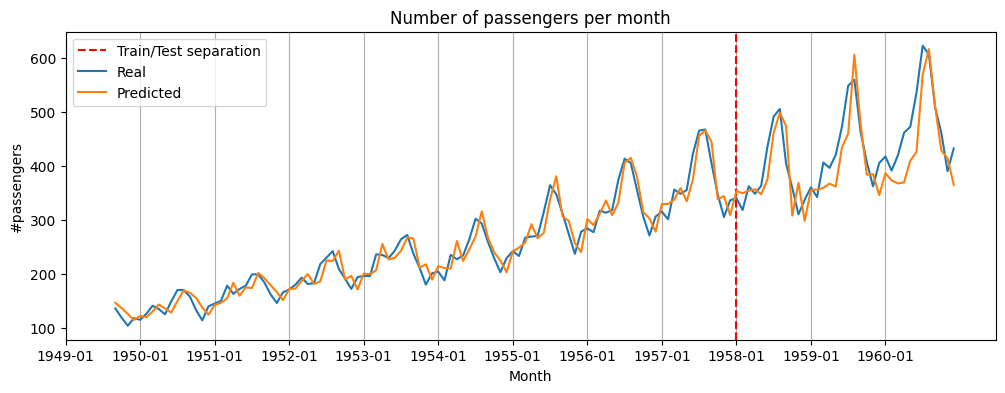

In [ ]:
import matplotlib.pyplot as plt

lstm.eval()
train_predict = lstm(x)
labels_to_display = [i for i in range(training_data.shape[0]) if i % 12 == 0]
time_series_plot(train_predict)

### Выводы

---
1. Использование LSTM слоев при прогнозировании нестационарных временных рядов — отличное решение, т.к. нейронная сеть способна самостоятельно выделить динамики изменениях составляющих временного ряда. Правда, в более сложных случаях (трейдинге, например, или чтении и расшифровки волн мозга) приходится прибегать к feature engineering.
2. Сложность нейронной сети должна соответствовать сложности подаваемых в нее данных. С ростом ансамбля и числа нейронов увеличивается заучивание тренировочной выборки и теряется способность к обобщению.
3. Предварительный анализ цикличности в данных (если она есть) помогает понять оптимальный размер ансамбля (тут видно, что цикл, в среднем, составляет 8 интервалов).
4. Также результат может зависеть от типа масштабирования, который Вы применяете. Нужно знать принципы работы scaler'ов и не стесняться экспериментировать с ними. См. [Feature Scaling Data with Scikit-Learn for Machine Learning in Python](https://stackabuse.com/feature-scaling-data-with-scikit-learn-for-machine-learning-in-python/) и [Hands-On Machine Learning with Scikit-Learn and TensorFlow, ч.4](https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/ch04.html1).
5. При всей выгодности применения нейронных сетей, необходимо быть осторожным с автокорреляцией (см. статью [How to avoid machine learning pitfalls:
a guide for academic researchers](https://arxiv.org/pdf/2108.02497.pdf)).

## Модификации LSTM

Было предложено множество модификаций структуры LSTM.

### Peephole connections

Например, введение возможности всем gates напрямую подсматривать в вектор контекста $C$. Что, безусловно, логично: сложно решать, что делать с вектором $C$ (что из него стирать, что в него добавлять, что из него брать), если видишь его только опосредованно.

<img src="https://edunet.kea.su/repo/EduNet-content/L08/out/lstm_peepholes_connections.png" width="500">

$\large f_t = \sigma(W_f \cdot [C_{t-1}, h_{t-1}, x_t] + b_f)$

$\large i_t = \sigma(W_i \cdot [C_{t-1}, h_{t-1}, x_t] + b_i)$

$\large o_t = \sigma(W_o \cdot [C_t, h_{t-1}, x_t] + b_o)$

### Объединение forget и input gates

Также кажется, что правильно требовать от нейросети принимать решение о записи в вектор и стирании из него информации $C$ одновременно. Если что-то стираем, надо что-то записать. И наоборот.

<img src="https://edunet.kea.su/repo/EduNet-content/L08/out/lstm_join_input_and_forget_gate.png" width="500">

$\large C_t = f_t * C_{t-1} + (1-f_t) * \tilde C_t$

### GRU (Gated reccurent unit)

Самая известная модификация LSTM — GRU. Она более компактна за счет сильных упрощений в сравнении со стандартной LSTM.

Главные изменения: объединены forget и input gates, слиты $h_t$ и $C_t$, которые в обычной LSTM только участвовали в формировании друг друга.

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/gru_basic_block.png" width="500">

$\large z_t = \sigma(W_z \cdot [h_{t-1}, x_t])$

$\large r_t = \sigma(W_r \cdot [h_{t-1}, x_t])$

$\large \tilde h_t = tanh(W \cdot [r_t * h_{t-1}, x_t])$

$\large h_t = (1-z_t) * h_{t-1} + z_t * \tilde h_t$

In [ ]:
gru = torch.nn.GRU(input_size=4, hidden_size=3)
input = torch.randn(2, 1, 4)  # seq_len, batch, input_size
h0 = torch.randn(1, 1, 3)
output, h = gru(input, h0)

print("Input shape:".ljust(15), input.shape)
print("Shape of h:".ljust(15), h.shape)  # last h
print("Output shape:".ljust(15), output.shape)  # seq_len = 2

Input shape:    torch.Size([2, 1, 4])
Shape of h:     torch.Size([1, 1, 3])
Output shape:   torch.Size([2, 1, 3])


Практический опыт исследователей: иногда лучше работает GRU, иногда — LSTM. Точный рецепт успеха сказать нельзя

# Пример посимвольной генерации текста

[Github RNN-walkthrough](https://github.com/gabrielloye/RNN-walkthrough/blob/master/main.ipynb)

Одним из основных направлений использования рекуррентных сетей является работа с текстами:
- генерация (Language modeling)
- перевод (Machine Translation)

Давайте посмотрим, как решаются такого рода задачи.

Начнем с относительно простой задачи — посимвольной генерации текста.

**Постановка задачи:** предсказать следующий символ в последовательности.

- исходный текст:
'hey how are you'

- искаженный текст:
'hey how are yo'

- Верное предсказание:
'u'

Теоретически эту технику можно использовать для генерации подсказок при наборе текстов, исправления ошибок или восстановления частично утраченного текста.

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/character_by_character_generation_example.gif" width="400">

<em>Source: <a href="http://karpathy.github.io/2015/05/21/rnn-effectiveness/">The Unreasonable Effectiveness of Recurrent Neural Networks</a></em>

## Подготовка данных

1. Зафиксировать словарь
2. Разбить данные
3. Выполнить кодирование символов

In [ ]:
import pprint

text = ["hey how are you", "good i am fine", "have a nice day"]

# Join all the sentences together and extract the unique characters
# from the combined sentences
chars = set("".join(text))
# Creating a dictionary that maps integers to the characters
int2char = dict(enumerate(chars))
# Creating another dictionary that maps characters to integers
char2int = {char: ind for ind, char in int2char.items()}

print("Dictionary for mapping character to the integer:")
pprint.pprint(char2int)

Dictionary for mapping character to the integer:
{' ': 15,
 'a': 2,
 'c': 11,
 'd': 16,
 'e': 13,
 'f': 1,
 'g': 12,
 'h': 14,
 'i': 0,
 'm': 9,
 'n': 5,
 'o': 6,
 'r': 3,
 'u': 8,
 'v': 4,
 'w': 7,
 'y': 10}


Вместо ASCII символа, каждой букве мы сопоставили номер.

### Выравнивание данных (Padding)

RNN допускают работу с данными переменной длины. Но чтобы поместить предложения в batch, надо их выровнять.

Обычно размер батча делают равным самому длинному предложению, а остальные просто дополняют пробелами (или спецсимволами) до этого размера.  Также хорошей идеей будет отметить специальным символом начало предложения.

In [ ]:
lengths = [len(sent) for sent in text]
maxlen = max(lengths)
print(f"The longest string has {maxlen} characters.\n")

print(f"Initial texts:\n{text}")
# A simple loop that loops through the list of sentences and adds
# a ' ' whitespace until the length of the sentence matches
# the length of the longest sentence
for i in range(len(text)):
    while len(text[i]) < maxlen:
        text[i] += " "

print(f"Resulting texts:\n{text}")

The longest string has 15 characters.

Initial texts:
['hey how are you', 'good i am fine', 'have a nice day']
Resulting texts:
['hey how are you', 'good i am fine ', 'have a nice day']


### Разбиение данных

В качестве входа будем использовать предложение без последнего символа:

**'hey how are yo'**

В качестве результата — предложение, в котором он сгенерирован:

**'ey how are you'**

In [ ]:
# Creating lists that will hold our input and target sequences
input_seq = []
target_seq = []

for i in range(len(text)):
    # Remove last character for input sequence
    input_seq.append(text[i][:-1])

    # Remove first character for target sequence
    target_seq.append(text[i][1:])

    print("Input sequence:".ljust(18), f"'{input_seq[i]}'")
    print("Target sequence:".ljust(18), f"'{target_seq[i]}'")
    print()

Input sequence:    'hey how are yo'
Target sequence:   'ey how are you'

Input sequence:    'good i am fine'
Target sequence:   'ood i am fine '

Input sequence:    'have a nice da'
Target sequence:   'ave a nice day'



### Кодирование

Теперь символы надо перевести в числа. Для этого мы уже построили словарь.

P.S. Запускать блок только один раз.

In [ ]:
for i in range(len(text)):
    input_seq[i] = [char2int[character] for character in input_seq[i]]
    target_seq[i] = [char2int[character] for character in target_seq[i]]

    print("Encodded input sequence:".ljust(25), input_seq[i])
    print("Encodded target sequence:".ljust(25), target_seq[i])
    print()

Encodded input sequence:  [14, 13, 10, 15, 14, 6, 7, 15, 2, 3, 13, 15, 10, 6]
Encodded target sequence: [13, 10, 15, 14, 6, 7, 15, 2, 3, 13, 15, 10, 6, 8]

Encodded input sequence:  [12, 6, 6, 16, 15, 0, 15, 2, 9, 15, 1, 0, 5, 13]
Encodded target sequence: [6, 6, 16, 15, 0, 15, 2, 9, 15, 1, 0, 5, 13, 15]

Encodded input sequence:  [14, 2, 4, 13, 15, 2, 15, 5, 0, 11, 13, 15, 16, 2]
Encodded target sequence: [2, 4, 13, 15, 2, 15, 5, 0, 11, 13, 15, 16, 2, 10]



#### One-hot encoding

Теперь из чисел надо сделать вектора.

Почему бы не оставить числа?
В прошлом примере модель хорошо с ними работала.

В прошлом примере использовался MSE, и на выходе было число.

Если бы мы определили отношение порядка над номерами букв, то что-то подобное можно было бы сделать.

Однако сейчас мы предсказываем класс буквы.
Поэтому на входе и на выходе должен быть вектор.

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/one_hot_encoding_softmax.png" width="250">

In [ ]:
import numpy as np

dict_size = len(char2int)
seq_len = maxlen - 1
batch_size = len(text)


def one_hot_encode(sequence, dict_size, seq_len, batch_size):
    # Creating a multi-dimensional array of zeros with the desired output shape
    features = np.zeros((batch_size, seq_len, dict_size), dtype=np.float32)

    # Replacing the 0 at the relevant character index with a 1 to represent that character
    for i in range(batch_size):
        for u in range(seq_len):
            features[i, u, sequence[i][u]] = 1
    return features


input_seq = one_hot_encode(input_seq, dict_size, seq_len, batch_size)
print(
    "Input shape: {} --> (Batch Size, Sequence Length, One-Hot Encoding Size)".format(
        input_seq.shape
    )
)
print(input_seq[0])

Input shape: (3, 14, 17) --> (Batch Size, Sequence Length, One-Hot Encoding Size)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Каждый символ закодировали вектором.
Не слишком экономно, зато удобно умножать на матрицу весов.

P.S. Запускать только один раз

**Пример: Language Modeling**

Кодируем буквы при помощи **one-hot кодирования** и подаем на входной слой.

$\begin{bmatrix} w_{11} & w_{12} & w_{13} & w_{14} \\ w_{21} & w_{22} & w_{23} & w_{24} \\ w_{31} & w_{32} & w_{33} & w_{34} \end{bmatrix} \cdot \begin{bmatrix} 1 \\ 0\\ 0 \\ 0 \end{bmatrix} = \begin{bmatrix} w_{11} \\ w_{21} \\ w_{31}\end{bmatrix}$

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/language_modeling.png" width="550">

Умножение матрицы на one-hot представление просто достает соответствующую ненулевому значению колонку из матрицы весов.
Поэтому часто вместо напсания двух отдельных слоев (one-hot + линейного) делают просто слой, называемый **Embedding Layer**.

In [ ]:
# Convert data to tensor
import torch

input_seq = torch.Tensor(input_seq)
target_seq = torch.Tensor(target_seq)

## Создание и обучение модели

In [ ]:
import torch.nn as nn


class NextCharacterGenerator(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super().__init__()

        # RNN Layer
        self.rnn = nn.RNN(input_size, hidden_size=hidden_dim, batch_first=True)
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x):
        batch_size = x.size(0)
        # Initializing hidden state for first input using method defined below
        hidden_0 = torch.zeros(
            1, batch_size, self.rnn.hidden_size
        )  # 1 correspond to number of layers

        # Passing in the input and hidden state into the model and obtaining outputs
        out, hidden = self.rnn(x, hidden_0)

        # Reshaping the outputs such that it can be fit into the fully connected layer
        # Need Only if n_layers > 1
        out = out.contiguous().view(-1, self.rnn.hidden_size)
        out = self.fc(out)

        return out, hidden

### Обучение

In [ ]:
# Instantiate the model with hyperparameters
model = NextCharacterGenerator(
    input_size=dict_size, output_size=dict_size, hidden_dim=12, n_layers=1
)

# Define hyperparameters
num_epochs = 100

# Define Loss, Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training Run
for epoch in range(1, num_epochs + 1):
    optimizer.zero_grad()  # Clears existing gradients from previous epoch
    output, hidden = model(input_seq)
    loss = criterion(output, target_seq.view(-1).long())
    loss.backward()  # Does backpropagation and calculates gradients
    optimizer.step()  # Updates the weights accordingly

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}/{num_epochs}".ljust(20), end=" ")
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100        Loss: 2.4008
Epoch: 20/100        Loss: 1.9664
Epoch: 30/100        Loss: 1.5803
Epoch: 40/100        Loss: 1.2096
Epoch: 50/100        Loss: 0.9017
Epoch: 60/100        Loss: 0.6357
Epoch: 70/100        Loss: 0.4329
Epoch: 80/100        Loss: 0.2999
Epoch: 90/100        Loss: 0.2159
Epoch: 100/100       Loss: 0.1633


### Тестирование

In [ ]:
def predict(model, character):
    # One-hot encoding our input to fit into the model
    character = np.array([[char2int[c] for c in character]])
    character = one_hot_encode(character, dict_size, character.shape[1], 1)
    character = torch.from_numpy(character)

    out, hidden = model(character)
    # print(out.shape)
    # print(out)
    prob = nn.functional.softmax(out[-1], dim=0).data
    # Taking the class with the highest probability score from the output
    char_ind = torch.max(prob, dim=0)[1].item()

    return int2char[char_ind], hidden


def sample(model, out_len, start="hey"):
    model.eval()  # eval mode
    start = start.lower()
    # First off, run through the starting characters
    chars = [ch for ch in start]
    size = out_len - len(chars)
    # Now pass in the previous characters and get a new one
    for _ in range(size):
        char, h = predict(model, chars)
        chars.append(char)

    return "".join(chars)


sample(model, 15, "good")

'good i am fine '

Попробуем сгенерировать несколько вариантов предложения.

In [ ]:
for _ in range(3):
    print(sample(model, 15, "good"))

good i am fine 
good i am fine 
good i am fine 


Так получается, потому что сеть инициализирована нулями и никакой случайности нет. Даже если мы добавим в датасет ещё предложение, начинающиеся с *good*, результат не изменится. Также сеть переобучилась на небольшом датасете.

# Embedding

Ранее мы применяли OneHotEncoding для представления наших слов. Проблемы возникают, когда пространство объектов начинает расти и у нас возникают огромные разреженные матрицы.

Кроме того, некоторые объекты у нас сразу могут быть ближе: семантически "король" и "королева" отличаются только полом, различие между словами "король" и "стул" заметно выше.

Поэтому мы можем переводить наши слова в вектора меньшей размерности, которые при этом будут сравнимы между собой с помощью модуля [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html).

[Туториал PyTorch по применению эмбедингов в NLP](https://pytorch.org/tutorials/beginner/nlp/word_embeddings_tutorial.html).

[NLP Course for you](https://lena-voita.github.io/nlp_course.html)

[Курс по NLP от ШАД](https://github.com/yandexdataschool/nlp_course)

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/word_representation_intro_min.png" width="600">

<em>Source: <a href="https://lena-voita.github.io/nlp_course/word_embeddings.html">Lena Voita NLP Course</a></em>

____

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/lookup_table.gif" width="600">

<em>Source: <a href="https://lena-voita.github.io/nlp_course/word_embeddings.html">Lena Voita NLP Course</a></em>

In [ ]:
# Let's say you have 2 sentences (lowercased, punctuations removed):
sentences = "i am new to pytorch i am having fun"

words = sentences.split(" ")

print(f"All words: {words} \n")

vocab = set(words)  # create a vocabulary
vocab_size = len(vocab)

print(f"Vocabulary (unique words): {vocab} \n")
print(f"Vocabulary size: {vocab_size} \n")

# map words to unique indices
word2idx = {word: ind for ind, word in enumerate(vocab)}

print(f"Word-to-id dictionary: {word2idx} \n")

encoded_sentences = [word2idx[word] for word in words]

print(f"Encoded sentences: {encoded_sentences}")

# let's say you want embedding dimension to be 3
emb_dim = 3

All words: ['i', 'am', 'new', 'to', 'pytorch', 'i', 'am', 'having', 'fun'] 

Vocabulary (unique words): {'fun', 'pytorch', 'new', 'to', 'am', 'having', 'i'} 

Vocabulary size: 7 

Word-to-id dictionary: {'fun': 0, 'pytorch': 1, 'new': 2, 'to': 3, 'am': 4, 'having': 5, 'i': 6} 

Encoded sentences: [6, 4, 2, 3, 1, 6, 4, 5, 0]


Теперь нейросетевой слой эмбеддингов может быть определён так:

In [ ]:
import torch
import torch.nn as nn


emb_layer = nn.Embedding(vocab_size, emb_dim)

word_vectors = emb_layer(torch.LongTensor(encoded_sentences))

print(f"Shape of encoded sentences: {word_vectors.shape} \n")

print(f"Shape of weigths: {emb_layer.weight.shape}")

Shape of encoded sentences: torch.Size([9, 3]) 

Shape of weigths: torch.Size([7, 3])


Этод код инициализирует эмбеддинги согласно нормальному распределению (со средним значением 0 и дисперсией 1). Таким образом, пока что никакого различия или сходства между векторами нет.

`word_vectors` — тензор размером (9,3). 9 слов в датасете, размер 3 задан нами.

`emb_layer` имеет 1 обучаемый параметр `weight`, который по умолчанию True. Можем проверить так:

In [ ]:
emb_layer.weight.requires_grad

True

Если мы не хотим обучать этой слой (например, используем заранее обученные эмбеддинги), мы можем заморозить его веса:

In [ ]:
emb_layer.weight.requires_grad = False

Если мы хотим использовать заранее определённые веса:

In [ ]:
# predefined weights
weight = torch.FloatTensor([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]])
print(weight.shape)
embedding = nn.Embedding.from_pretrained(weight)
# get embeddings for ind 0 and 1
embedding(torch.LongTensor([0, 1]))

torch.Size([2, 3])


tensor([[0.1000, 0.2000, 0.3000],
        [0.4000, 0.5000, 0.6000]])

Скачаем уже готовые веса модели Word2Vec, обученные на датасете Google News, состоящeм из 100 миллиардов слов:

In [ ]:
!wget -q https://www.dropbox.com/s/699kgut7hdb5tg9/GoogleNews-vectors-negative300.bin.gz?dl=1
!mv 'GoogleNews-vectors-negative300.bin.gz?dl=1' GoogleNews-vectors-negative300.bin.gz

# Use this way for loading from our host
# !wget https://edunet.kea.su/repo/EduNet-web_dependencies/weights/GoogleNews-vectors-negative300.bin.gz
# !mv 'GoogleNews-vectors-negative300.bin.gz' GoogleNews-vectors-negative300.bin.gz

!gunzip -q GoogleNews-vectors-negative300.bin.gz

In [ ]:
from gensim.models import KeyedVectors

wordvector_path = "GoogleNews-vectors-negative300.bin"
word_vectors = KeyedVectors.load_word2vec_format(wordvector_path, binary=True)

In [ ]:
weights = torch.FloatTensor(word_vectors.vectors)

In [ ]:
weights.shape

torch.Size([3000000, 300])

In [ ]:
embedding = nn.Embedding.from_pretrained(weight)

input = torch.LongTensor([0, 1])

embedding(input)

tensor([[0.1000, 0.2000, 0.3000],
        [0.4000, 0.5000, 0.6000]])

Также мы можем воспользоваться библиотекой [torchtext](https://pytorch.org/text/stable/index.html). Возьмём таблицу весов поменьше, всего 10000 наиболее часто встречающихся слов. Зададим длину тензора — 50.

In [ ]:
import torchtext

glove = torchtext.vocab.GloVe(
    name="6B", dim=50, max_vectors=10000
)  # use 10k most common words

.vector_cache/glove.6B.zip: 862MB [02:38, 5.43MB/s]                           
100%|█████████▉| 9999/10000 [00:00<00:00, 35372.33it/s]


Если обратиться к документации, мы увидим, что 6В — это [лишь один из вариантов весов](https://pytorch.org/text/stable/_modules/torchtext/vocab/vectors.html#GloVe).

In [ ]:
glove_emb = nn.Embedding.from_pretrained(glove.vectors)

In [ ]:
input = torch.LongTensor([0, 1])
glove_emb(input).shape

torch.Size([2, 50])

Код нейросети со слоем nn.Embedding выглядит следующим образом:

In [ ]:
class RNN_with_Embedding_Layer(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(RNN_with_Embedding_Layer, self).__init__()
        self.emb = nn.Embedding.from_pretrained(glove.vectors)
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Look up the embedding
        x = self.emb(x)
        # Set an initial hidden state
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        # Forward propagate the RNN
        out, _ = self.rnn(x, h0)
        # Pass the output of the last time step to the classifier
        out = self.fc(out[:, -1, :])
        return out


model = RNN_with_Embedding_Layer(input_size=50, hidden_size=128, num_classes=3)
print(model)

RNN_with_Embedding_Layer(
  (emb): Embedding(10000, 50)
  (rnn): RNN(50, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=3, bias=True)
)


## Токенизация

На практике часто встает вопрос о том, как делить текст на естественном языке на токены. Должны ли это быть символы, слова, или части слов? Рассмотрим подходы к тому, как производится токенизация в современных языковых моделях.

### Наивная токенизация

Рассмотрим предложение: `Я люблю Natural Language Processing (NLP). А ты?`

Присваивать отдельный индекс каждому предложению, кажется, совсем не оптимально. Что тогда? Мы можем разбить предложение на слова (*токенезировать предложение*) по пробелам.

In [ ]:
input = "Я люблю Natural Language Processing (NLP). А ты?"
tokenized = input.split(" ")
print(tokenized)

['Я', 'люблю', 'Natural', 'Language', 'Processing', '(NLP).', 'А', 'ты?']


Неплохо, но можно обратить внимание, что мы не учли пунктуацию. Кажется неразумным создавать отдельный индекс для каждой комбинации NLP и знаков препинания. Давайте проведём токенизацию с учётом знаков препинания.

In [ ]:
import re

# initializing string
input = "Я люблю Natural Language Processing (NLP). А ты?"

# using findall() to get all regex matches.
res = re.findall(r"\w+|[^\s\w]+", input)

# printing result
print(str(res))

['Я', 'люблю', 'Natural', 'Language', 'Processing', '(', 'NLP', ').', 'А', 'ты', '?']


Лучше, но представьте себе размер словаря, если мы будем токенизировать таким образом все слова в Википедии. Такой большой объём словаря приведёт к тому, что у модели будет огромный размер эмбеддингов в качестве входного и выходного слоя, что приведёт к увеличению необходимой памяти. Обычно размер словаря трансформеров не превышает 50 000 токенов. Почему бы тогда не использовать посимвольную токенезацию, как раньше?

Хотя посимвольная токенизация очень проста и значительно снижает требования к памяти, она значительно усложняет обучение модели осмысленным представлениям входных данных. Например, выучить осмысленное контекстно-независимое представление для буквы `"с"` гораздо сложнее, чем выучить контекстно-независимое представление для слова `"сегодня"`. Поэтому токенизация символов часто сопровождается потерей производительности. Чтобы получить лучшее из двух миров, используют что-то среднее между токенизацией на уровне слов и на уровне символов, называемый токенизацией подслова (*subword tokenization*).


### Subword Tokenization (Токенизация подслова)

Алгоритмы токенизации подслова основываются на принципе, что часто используемые слова не должны разбиваться на более мелкие подслова, а редкие слова должны быть разложены на значимые подслова. Например, слово "*annoyingly*" может считаться редким словом и может быть разложено на "*annoying*" и "*ly*". И "*annoying*", и "*ly*" как самостоятельные подслова будут встречаться чаще, и в то же время значение слова "*annoyingly*" сохранится за счёт составного значения "*annoying*" и "*ly*".

Токенизация подслова позволяет модели иметь разумный объём словаря и при этом обучаться значимым контекстно-независимым представлениям. Кроме того, токенизация подслова позволяет модели обрабатывать слова, которые она никогда раньше не видела, путём разложения их на известные подслова.

Воспользуемся популярной библиотекой для токенизации от команды Hugging Face `transformers`.

In [ ]:
!pip install -q transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 10.1 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
tokenizer.tokenize(
    "I have a new neighbor. Every morning he annoyingly drills the wall."
)


['i',
 'have',
 'a',
 'new',
 'neighbor',
 '.',
 'every',
 'morning',
 'he',
 'annoying',
 '##ly',
 'drills',
 'the',
 'wall',
 '.']

Предложение сначала было приведено к нижнему регистру. Мы видим, что слова ["i", "have", "a", "new"] присутствуют в словаре токенизатора, а слово "annoyingly" — нет. Следовательно, токенизатор разбивает "annoyingly" на известные подслова: ["annoying" и "##ly"]. "##" означает, что остальная часть лексемы должна быть присоединена к предыдущей без пробела (для декодирования или обратного хода токенизации).

### Byte-Pair Encoding (BPE)


Кодирование байт-парой (BPE) опирается на претокенизатор, который разбивает обучающие данные на слова. Примером простой претокенизации может быть разбивка по пробелам. Более продвинутая предварительная токенизация включает токенизацию на основе каких-то правил.

После предварительной токенизации у нас получится набор уникальных слов и будет определена частота встречаемости каждого слова в обучающих данных. Затем BPE создаёт базовый словарь, состоящий из всех символов, которые встречаются в наборе уникальных слов, и изучает правила слияния для формирования нового символа из двух символов базового словаря. Так происходит до тех пор, пока словарный запас не достигнет желаемого размера. Обратите внимание, что желаемый объём словаря — это гиперпараметр, который необходимо определить перед обучением токенизатора.


**Пример**: после предварительной токенизации был определён набор слов, включая их частоту:

`("hug", 10), ("pug", 5), ("pun", 12), ("bun", 4), ("hugs", 5)`

Видим, что базовый словарь —  `["b", "g", "h", "n", "p", "s", "u"]`.

Разделим все слова на отдельные буквы:

`("h" "u" "g", 10), ("p" "u" "g", 5), ("p" "u" "n", 12), ("b" "u" "n", 4), ("h" "u" "g" "s", 5)`

BPE подсчитывает **частоту** каждой возможной пары символов и **выбирает** ту пару символов, которая встречается наиболее часто. В приведённом выше примере `"h"`, за которым следует `"u"`, встречается 10 + 5 = 15 раз. Однако наиболее частой парой символов является `"u"`, за которой следует `"g"`, встречающаяся 10 + 5 + 5 = 20 раз. Таким образом, первое правило слияния, которому обучается токенизатор, — сгруппировать все символы `"u"`, за которыми следует символ `"g"`, вместе. Затем `"ug"` добавляется в словарь. После этого набор слов становится следующим:

`("h" "ug", 10), ("p" "ug", 5), ("p" "u" "n", 12), ("b" "u" "n", 4), ("h" "ug" "s", 5)`

Затем BPE определяет следующую наиболее часто встречающуюся пару символов. Это `"u"`, за которым следует `"n"`, который встречается 16 раз. `"u"`, `"n"` объединяются в `"un"` и добавляются в словарь. Следующая по частоте пара символов — `"h"`, за которой следует `"ug"`, 15 раз. Снова пара объединяется, и `"hug"` может быть добавлен в словарь.

На данном этапе словарь состоит из `["b", "g", "h", "n", "p", "s", "u", "ug", "un", "hug"]`, а наш набор уникальных слов представлен как

`("hug", 10), ("p" "ug", 5), ("p" "un", 12), ("b" "un", 4), ("hug" "s", 5)`

Если остановить обучение BPE на этом моменте, то выученные правила слияния будут применяться к новым словам (при условии, что эти новые слова не содержат символов, которых не было в базовом словаре).

Например, слово `"bug"` будет токенизировано как `["b", "ug"]`, а `"mug"` будет токенизировано как `["<unk>", "ug"]`, поскольку символ `"m"` отсутствует в базовом словаре. Как правило, отдельные буквы, такие как `"m"`, не заменяются символом `"<unk>"`, поскольку обучающие данные обычно включают хотя бы одно вхождение каждой буквы, но это может произойти и для специальных символов, таких как эмодзи.

Размер словаря, т.е. размер базового словаря + количество слияний, является **гиперпараметром**.

Есть и множество других форм токенизации, подробнее о них можно прочитать в [Summary of the tokenizers](https://huggingface.co/docs/transformers/tokenizer_summary).

# Sequence-to-Sequence with RNNs

Попробуем решить задачу **sequence-to-sequence**: преобразование последовательности $X$ длины $N$ в последовательность $Y$ длины $T$. $T$ **может быть не равно** $N$.

Примеры **sequence-to-sequence** задач:
*   машинный перевод,
*   генерация ответа на вопрос,
*   генерация описания картинки или видео.

Для решения таких задач  можно использовать две **RNN**: **кодировщик** и **декодировщик**.
* Задача **кодировщика**: обобщить информацию о **входной последовательности** $X = (x_1,..., x_N)$, сформировав **вектор контекста** $C$ фиксированного размера.
* Задача **декодировщика**: используя информацию из $C$, сформировать **выходную последовательность** $Y = (y_1, ..., y_T)$.

В качестве вектора $C$ можно использовать последнее **скрытое состояние** кодировщика $h_N$.

Таким образом:

* **вход** — последовательность  $\large x_1, \dots, x_N$;
* **выход** — последовательность  $\large y_1, \dots, y_T$.

Кодировщик на основании входной последовательности предсказывает **нулевое скрытое состояние декодировщика и вектор контекста** $\large с$, который часто равен финальному скрытому состоянию кодировщика.

**Кодировщик:** $\large h_i = f_w(x_i, h_{i_1})$

**Декодировщик:** $\large s_t = g_u(y_{t-1}, s_{t-1}, c)$

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/seq_to_seq_with_rnn.png" width="800">

При этом возникает следующая **проблема:** мы пропускаем информацию из входной последовательности через бутылочное горлышко — вектор фиксированного размера $h_N$. Что будет, если размер последовательности 1000?

**Идея:** использовать новый вектор контекста на каждом шаге.

В данном подходе мы используем один **вектор контекста** фиксированной длины $c$, в который собираем информацию со всей **входной последовательности** $(x_1,...,x_N)$.

**Входная последовательность** может содержать как единицы, так и тысячи элементов. В задаче машинного перевода **входной последовательностью** может быть:
* короткая фраза,
* абзац “Войны и мира”.

Контекст важен. Для генерации глагола в правильной форме нужно понимать, к какому существительному он относится, а для качественного перевода конца абзаца необходимо понимать, о чем шла речь в его начале.

### Проблемы Sequence-to-Sequence with RNNs

При этом возникают проблемы:
- **Вектор контекста** $c$ фиксированной длины не может вместить любое количество информации, поэтому для длинных последовательностей качество будет ухудшаться.
- На каждой итерации декодировщика **скрытое состояние** $s_t$ должно сохранять информацию о том, какие элементы **выходной последовательности** уже были сгенерированы. Если $s_t$ не способно вместить эту информацию, модель может зациклиться или потерять часть **выходной последовательности**.

**Вектор контекста** $c$ и **скрытые состояния** декодировщика $s_t$ являются “бутылочными горлышками” модели.

# Attention

## Sequence-to-Sequence with RNNs and Attention mechanism

**Модель внимания — сходство входного и выходного состояния.**

$\large a(h, h^{'})$ — функция сходства состояний входа $h$ и выхода $h^{'}$

$\large a_{ti}$  — важность входа $i$ для выхода $t$ (attention score), $\large \sum_{i=1}a_{ti} = 1$

$\large c_t$ — вектор входного контекста для выхода t (context vector)

$\large h_i = f_{in}(x_i, h_{i-1});$

$\large \color{red}{\alpha_{ti} = norm_i \ a(h_i, h'_{t-1});}$

$\large \color{red}{c_t = \sum\limits_i \alpha_{t_i} h_i;}$

$\large h'_t = f_{out}(h'_{t-1}, y_{t-1}, \color{red}{c_t});$

$\large y_t = f_y(h'_t, y_{t-1}, \color{red}{c_t}).$

Примечание: $\large \displaystyle \color{red}{norm_i(p_i)} = {p_i \over \sum\limits_k p_k} .$

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/seq2seq_encoder_decoder_with_attention.png" width="700">

[К.В. Воронцов, Машинное обучение: Обработка последовательностей и модели внимания](http://www.machinelearning.ru/wiki/images/1/19/Voron-ML-Attention-slides.pdf)

Особенности:

* можно отказаться от рекуррентности по $h_i$;

* можно вводить обучаемые параметры в $a$ и $c$.

Как решить проблему “бутылочного горлышка”?
* формировать свой контекст $c_t$ для каждого элемента **выходной последовательности** $y_t$,
* использовать для формирования контекста $c_t$ все **скрытые состояния** кодировщика $h_i$.

Для формирования **векторов контекста** $(c_1, ..., c_T)$ возьмем линейную комбинацию **скрытых состояний** кодировщика $h_i$ с весами $a_{ti}$:
$$ c_t=\sum_{i=1}^{N}a_{ti}h_i.$$

$\alpha_{ti}$ называются **весами внимания**.

Веса $a_{ti}$ указывают, какие **скрытые состояния** кодировщика $h_i$ важны для формирования элемента **выходной последовательности** $y_t$.  Они “показывают” декодировщику куда “смотреть” при генерации данного элемента. Такой механизм в нейросетях получил название **attention** (внимание).

Веса $a_{ti}$ предсказывает сама модель. Для удобства веса подбираются таким образом, чтобы их сумма для каждого **вектора контекста** $c_t$ была равна 1 (нормализация):
$$ \sum_{i=1}^{N}a_{ti} = 1,$$

$$  0\leqslant a_{ti} \leqslant 1.$$

Для этого на выходе предсказывающего веса слоя ставят **SoftMax**.

Чтобы **вектор контекста** $c_t$ содержал информацию об уже сгенеренных элементах **выходной последовательности**, значение веса до нормализации  $e_{ti}$ зависит не только от скрытого состояния кодировщика $h_i$, но и от предыдущего скрытого состояния декодировщика $s_{t-1}$.

## Модели внимания в машинном переводе

Давайте посмотрим, как такой подход  работает на примере перевода с английского на французский.

На каждом шаге генерируется набор весов, которые отвечают за фокусировку на том или ином месте входной последовательности. Как мы видим, английское предложение имеет иной порядок слов относительно французского. Например, в английском варианте словосочетание **European Economic Area**, в то время как во французском **zone économique européenne**.

В английском прилагательные идут перед существительным, в то время как во французском языке наоборот.

Таким образом, благодаря гибкости модели мы можем обрабатывать и учитывать разный порядок слов в разных языках.

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/visualize_attention_weights.png" width="700">

<em>Source: <a href="https://arxiv.org/pdf/1409.0473.pdf">Neural machine translation by jointly learning to align and translate</a></em>



* Механизм внимания не обязательно должен принимать на вход последовательность.

* Мы можем применять его в том числе для генерации подписей для картинок. Входом в данном случае будет являться матрица признаков, которая была получена при применении сверточной сети к картинке.

* Далее по этой матрице мы считаем веса внимания и делаем аналогично первому примеру.

Следующим шагом будет также заметить, что для достаточно длинного предложения наша модель может забыть и то, что она генерирует. Потому мы можем сделать два attention: один — на представление исходного предложения, а второй — на представление того, что уже сгенерировано (что еще не сгенерировано заменяем нулями)


## Модели внимания в задаче генерации подписи к изображениям

Модель с вниманием также может быть применена в задаче, когда от нейронной сети требуется по изображению сгенерировать подпись.

Имеем набор пар "картинка : подпись"

Вместо рекуррентного кодировщика используем сверточную нейронную сеть. Веса внимания применяем к признакам на карте активации после нескольких сверточных слоев. Получается "маска" внимания.

Таким образом декодер имеет возможность обращать внимание на разные участки входного изображения при генерации очередного слова.

На иллюстрации приведены входные изображения и наложенные на них маски внимания, которые возникли в сети при генерации подчеркнутого слова.



<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/visulize_attention_map_examples.png" width="700">

<em>Source: <a href="https://arxiv.org/pdf/1502.03044.pdf">Show, Attend and Tell: Neural Image Caption Generation with Visual Attention</a></em>

Посмотрим, что “привлекает внимание” нейронной сети при написании текстового описания картинки.

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/visulize_attention_map.png" width="700">

<em>Source: <a href="https://arxiv.org/pdf/1502.03044.pdf">Show, Attend and Tell: Neural Image Caption Generation with Visual Attention</a></em>

Нейронные сети, использующие механизм внимания (attention), активно применяются для решения задачи [Visual Question Answering](https://paperswithcode.com/paper/vqa-visual-question-answering). В данной задаче нейросеть должна научиться давать развернутые ответы на вопросы по изображению. Модель должна не только решать задачу классификации, но и распознавать признаки (цвет, форма, размер, количество и т.д.) предметов на изображении, различать, в какой части изображения находится предмет и его положение относительно других предметов. Решение этой задачи может помочь людям с проблемами со зрением лучше ориентироваться в пространстве.

Подробнее:
1. [Нейросеть описывает мир незрячим людям](https://www.reg.ru/blog/nejroset-opisyvaet-mir-nezryachim-lyudyam/)
2. [Учим нейросети рассуждать о том, что они видят](https://www.reg.ru/blog/uchim-nejroseti-rassuzhdat-o-tom-chto-oni-vidyat/)

## Проблема attention

Attention решает проблему "забывания" при работе с последовательностями. Но цена этого решения — квадратичное возрастание вычислительной сложности с ростом длины последовательности.

Вычислительная сложность **одного слоя RNN** составляет $O(bn d^2)$, где $b$ — длина батча, $n$ — число токенов и $d$ — размерность входа. Часть $d^2$ обусловлена матричным перемножением внутри блока RNN.

Вычислительная сложность **одного слоя attention** в простейшей реализации составляет $O(bn^2 d)$, то есть растет квадратично при росте длины последовательности $n$. Это объясняется тем, что длина выходной последовательности приблизительно равна длине входной последовательности $n$, и необходимо для каждого выходного токена рассчитать коэффициенты attention со всеми входными токенами. Сложность расчета одного коэффициента в простейшем случае составляет $O(d)$.

Ни рекуррентные сети, ни attention не могут эффективно работать с очень длинными последовательностями. RNN/LSTM "забывают" начало последовательности, а attention просто не может выполнить расчет за разумное время.

На практике attention предпочтительнее, потому что удобнее иметь модель, которая или работает адекватно, или не работает вообще, чем модель, которая работает неадекватно ("забывает" контекст) без предупреждения.

Обычно для attention используют достаточно большую длину последовательности, чтобы в нее могло поместиться практически любое предложение или даже несколько предложений, например, 512 токенов.

## Разновидности функций сходства векторов

$\large a(h, h') = h^Th'$ — скалярное произведение;

$\large a(h, h') = exp(h^Th')$ — тогда norm превращается в SoftMax;

$\large a(h, h') = h^T\color{red}{W}h'$ — c матрицей обучаемых параметров $\color{red}{W}$;

$\large a(h, h') = \color{red}{w}^Tth(\color{red}{U}h + \color{red}{V}h')$ — аддитивное внимание с $\color{red}{w, U, V}$.

Вводя внимание, мы говорили о некоторой **функции сходства** между скрытым состоянием декодировщика $h'$ и скрытым состоянием кодировщика $h$. Обобщением механизма внимания является введение в функцию сходства  **обучаемых параметров**.

Какие вообще бывают функции сходства?


1.   Первое, что приходит голову — просто считать скалярное произведение $h$ и $h'$.
2.   Также можно брать от него экспоненту, тогда оператор нормировки превращается в **SoftMax**.

Первые два способа возможны, только если потребовать, чтобы $h$ и $h'$ имели одинаковую размерность.

3.   Можно вводить матрицу обучаемых параметров $W$.
4.   Можно вводить небольшую двухслойную нейронную сеть с несколькими весовыми матрицами. Такое введение функции сходства называется аддитивным вниманием.



## Key, query, value

**Линейные преобразования векторов** **Query**, **Key** и **Value**.

Наиболее часто используемым подходом является введение трех типов векторов, которые называют **Query**, **Key** и **Value**.

Для каждого типа вектора вводится свое линейное преобразование, которое из исходного вектора делает вектор в каком-то другом пространстве. Все три они
обычно приводятся к одной и той же размерности, обозначенной $d$.

$\large a(h_i, h^\prime_{t-1}) = (\color{red}{W_k}h_i)^T(\color{red}{W_q}h^\prime_{t-1}) / \sqrt d$

$\large \alpha_{ti} = SoftMax_i \space a(h_i, h^\prime_{t-1})$

$\large c_t = \Sigma_i \alpha_{ti} \color{red}{W_v} h_i$

$ \large \color{red}{W_q}_{d \times dim(h^\prime)}, \color{red}{W_k}_{d \times dim(h)}, \color{red}{W_v}_{d \times dim(h)}$ — матрицы весов линейных нейронов (обучаемые линейные преобразования в пространство размерности $\large d$).

Возможно упрощение модели: $\large \color{red}{W_k} \equiv \color{red}{W_v}$

Функция сходства $a$ — это скалярное произведение, но перед тем,
как сделать скалярное произведение, каждый из двух векторов $h$ и $h'$ мы переводим с помощью линейного преобразования в новое пространство. Тем самым мы даем возможность модели обучить эти параметры матриц весовых коэффициентов $W_k$ и $W_q$.

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/query_key_value.png" width="250">

<em>Source: <a href="http://www.machinelearning.ru/wiki/images/1/19/Voron-ML-Attention-slides.pdf">Обработка последовательностей: модели внимания и трансформеры</a></em>

Два преобразованных вектора они скалярное произведение, которое для нормировки делится на корень из размерности.

Нормировка на корень из размерности позволяет сделать SoftMax более сглаженным. Беда может заключаться в том, что в результате скалярного произведения могут образовываться слишком большие или слишком маленькие значения, соответственно, будет слишком большой разброс, и когда мы будем считать экспоненту, получим вектор, который стремится к нулям или к единицам.

Чтобы этого не происходило, производится деление на корень из размерности. Идея в том, что скалярное произведение двух векторов в пространстве размерности $d$ — это сумма $d$ компонент. Закон больших чисел говорит о том, что когда мы складываем много одинаково распределенных случайных
величин, то их дисперсия растет пропорционально $d$ и, соответственно,
среднеквадратическое отклонение — это $\sqrt d$.

Далее мы к результату нормированного скалярного произведения применяем SoftMax.

Еще одно обобщение: когда мы считаем вектор контекста, то мы складываем не сами входные векторы $h_i$, а преобразуем их в векторы значений (Value).

У нас есть три места, где используются векторы, и в каждом из этих мест выполняется свое преобразование вектора в пространство размерности $d$.

Матрицы весов этих преобразований обучаются вместе со всей остальной моделью.

Иногда вводят упрощение и считают преобразования Key и Value одним преобразованием. Это позволяет сократить количество параметров.

### Softmax normalization

Вы могли заметить, что в формуле для вычисления сходства между Key и Query мы делим на $\sqrt d$. Давайте убедимся, что стандартное отклонение скалярного произведения двух величин хорошо оценивается корнем из размерности.



Давайте сгенерируем вектор из многомерного нормального распределения

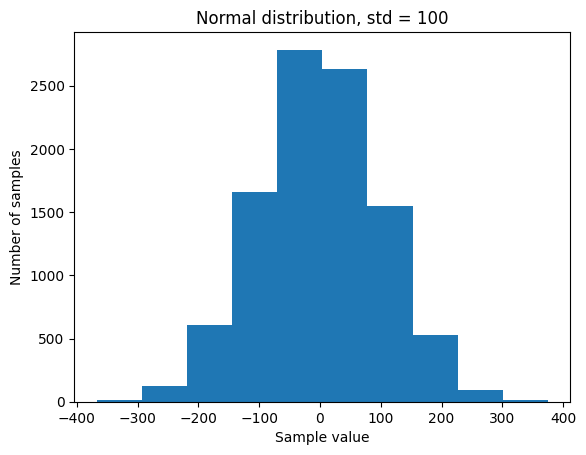

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = np.random.normal(0, 100, size=(10000))

plt.title("Normal distribution, std = 100")
plt.ylabel("Number of samples")
plt.xlabel("Sample value")

plt.hist(a)
plt.show()

И посмотрим, что будет с распределением значений этого вектора, если к нему применить SoftMax

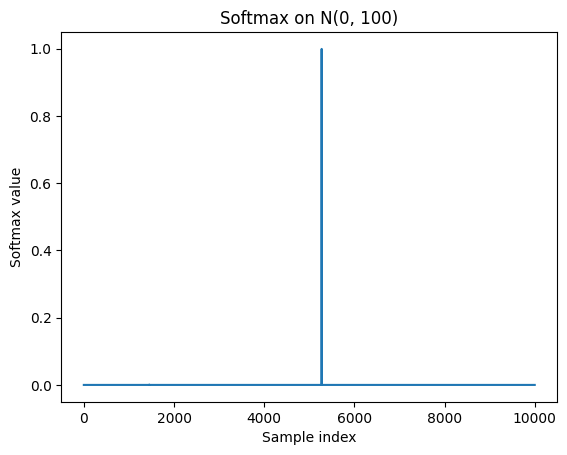

In [ ]:
from scipy.special import softmax

plt.title("Softmax on N(0, 100)")
plt.ylabel("Softmax value")
plt.xlabel("Sample index")

plt.plot(softmax(a))
plt.show()

Почти все значения 0 и одно (наибольшее), стало 1.
Мы получили так называемое вырожденное распределение — у него вся плотность сосредоточена в одной точке.

И получили на абсолютно случайных данных.

Это приведет к затуханию градиента: мы будем распространять ошибку только для 1 значения из 10000. Учиться сеть будет плохо.

Но этого можно избежать — давайте просто стандартизируем наши данные:

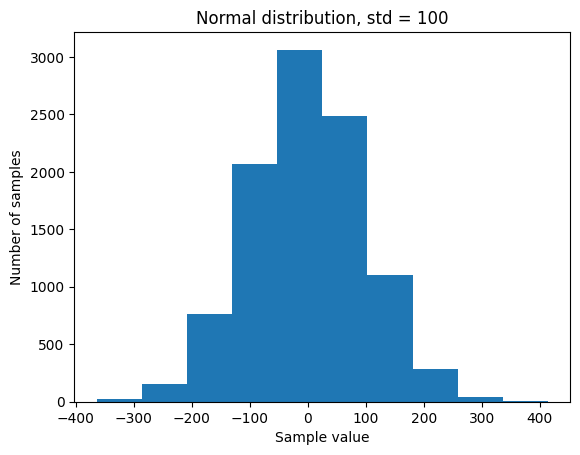

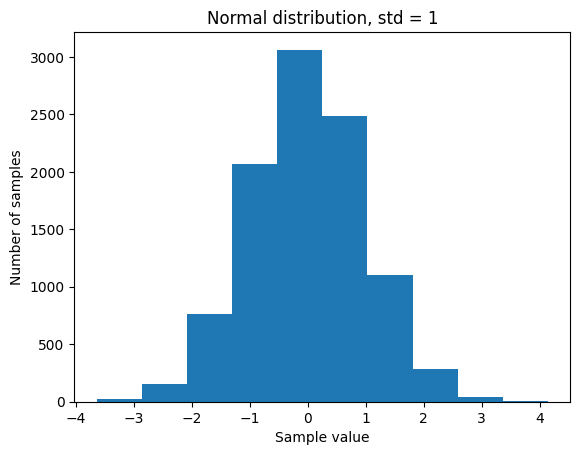

In [ ]:
std = np.random.normal(0, 100, size=(10000))

unit_std = std / 100

plt.title("Normal distribution, std = 100")
plt.ylabel("Number of samples")
plt.xlabel("Sample value")
plt.hist(std)
plt.show()

plt.title("Normal distribution, std = 1")
plt.ylabel("Number of samples")
plt.xlabel("Sample value")
plt.hist(unit_std)
plt.show()

По сути, в распределении ничего не поменялось, только масштаб. Но теперь SoftMax работает нормально

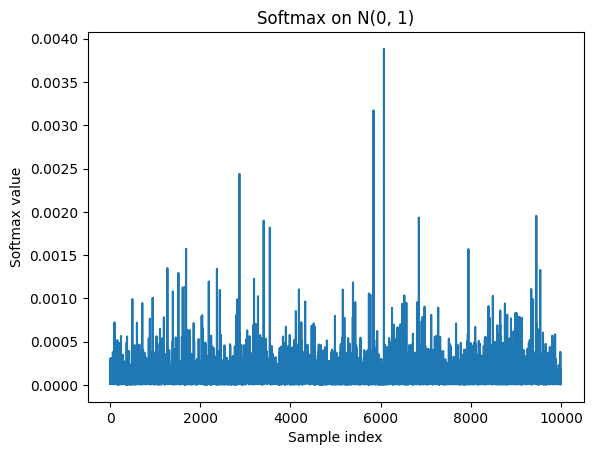

In [ ]:
plt.title("Softmax on N(0, 1)")
plt.ylabel("Softmax value")
plt.xlabel("Sample index")

plt.plot(softmax(unit_std))
plt.show()

Остается только понять, как нормировать наши данные в нашем слое. Считать налету, наверное, не лучшая идея.

Наш слой делает скалярное произведение между двумя векторами, предположим, нормально распределенными.

In [ ]:
def statistics(dimensionality, experiments=int(10e4)):
    c = []
    for i in range(experiments):
        a = torch.normal(0, 1, size=(int(dimensionality),))
        b = torch.normal(0, 1, size=(int(dimensionality),))
        c.append(torch.dot(a, b))

    c = torch.Tensor(c)
    return float(c.mean()), float(c.std())

In [ ]:
import torch

means, stds = {}, {}
dims = torch.linspace(0, 100, 20)

for dim in dims:
    dim = float(dim)
    t_mean, t_std = statistics(dim)
    means[dim] = t_mean
    stds[dim] = t_std

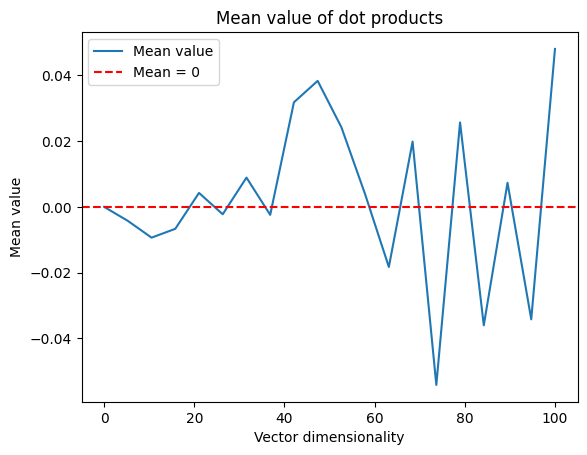

In [ ]:
x = list(means.keys())
y = list(means.values())

plt.plot(x, y)
plt.axhline(y=0, c="r", linestyle="--")
plt.legend(["Mean value", "Mean = 0"])
plt.title("Mean value of dot products")
plt.ylabel("Mean value")
plt.xlabel("Vector dimensionality")
plt.show()

Видим, что среднее не сильно отличается от 0 (можно показать, что в среднем оно равно 0 для произведения нормально распределенных величин).

А вот стандартное отклонение растет. И можно предположить, что растет оно как корень из размерности вектора. Так и есть. Потому и появляется именно такой нормировочный множитель в attention

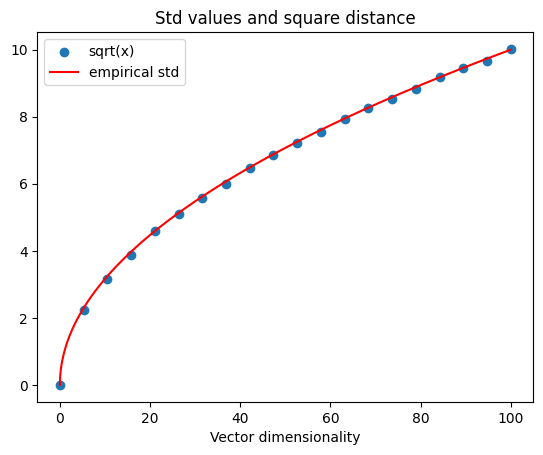

In [ ]:
x = list(stds.keys())
y = list(stds.values())
plt.scatter(x, y)
plt.title("Std values and square distance")
plt.xlabel("Vector dimensionality")

x = np.linspace(0, 100, 10000)
plt.plot(x, x**0.5, color="r")
plt.legend(["sqrt(x)", "empirical std"])
plt.show()

## Multihead Attention

**Идея:** $J$ разных моделей внимания совместно обучаются выделять различные аспекты входной информации (например, части речи, синтаксим, фразеологизмы):

$\large c_j = Attn(\color{red}{W^j_q}q, \color{red}{W^j_k}H,\color{red}{W^j_v}H, \ j = 1, \dots, j)$

**Варианты** агрегирования выходного вектор:

$\large \displaystyle c = {1 \over j} \sum\limits^J_{j=1}c^j$ — усреднение;

$\large \displaystyle c = [c^1 \dots c^J]$ — конкатенация;

$\large \displaystyle c = [c^1 \dots c^J]\color{red}{W}$ — возвращение к нужной размерности.

Давайте посмотрим на то, к каким словам предложения gave может иметь отношение. В общем случае глагол может иметь связку со многими частями предложения. Как, например, с подлежащим, так и с причастиями.

В идеале, нам бы хотелось обратить внимание функции (attention) на все эти взаимосвязи. Для этого нам просто надо поставить несколько attention слоев параллельно. Тогда каждый из них будет учить что-нибудь свое по аналогии со сверточными слоями.

* Чтобы осуществить задуманное, вместо одного набора query будем использовать несколько независимых наборов.

* Причем каждый набор будет считаться уникальной матрицей.

* Аналогично сделаем для keys и values. Количество таких наборов внутри keys, queries, values должно быть **одинаковым**.

* Обозначим это число как $J$, далее производим аналогичные манипуляции, при этом введем в параллель h таких функций attention.

* На последнем шаге мы их соединяем (конкатинируем).

* При этом можно заметить, что при таком подходе на каждом шаге размерность токена будет увеличиваться (если, например, в качестве и key, и value, и query мы подаем одно и тоже предсталение токена). Если хотим сохранять управление размерностью токена, то придется получать по меньшей мере value путем домножения на матрицу, размерность которой по второй оси меньше — **выполнять проекцию наших токенов в пространство меньшей размерности**.

* В частности, можно подобрать размерность этого пространства таким образом, чтобы при конкатенации размерность полученного токена равнялась исходной.

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/multihead_self_attention_layer.png" width="700">

## Image Captioning with RNNs and Attention

Модели, основанные на внимании (attention), намного более продвинутые, нежели обычные нейросети. Они могут концентрироваться на отдельных частях данных, что позволяет избежать зашумления представлений.

Идея состоит в том, что на каждом этапе генерации описания нейронная сеть в разной степени обращает внимание на те или иные фрагменты изображения, соответствующие следующему слову в описании.

После обучения модели можно увидеть, что она как бы переносит своё внимание по изображению для каждого генерируемого слова.

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/image_captioning_with_rnn_and_attention_example_step_1.png" width="700">

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/image_captioning_with_rnn_and_attention_example_step_2.png" width="700">

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/image_captioning_with_rnn_and_attention_example_step_3.png" width="700">

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/image_captioning_with_rnn_and_attention_example_step_4.png" width="700">

<em>Source: <a href="http://cs231n.stanford.edu/slides/2022/lecture_11_ruohan.pdf">Stanford University CS231n: lectures</a></em>

**А если картинки?**

К примеру, у нас есть картинка. На этой картинки у нас есть области, которые можно описать одним словом — **key**. Например, фонарь/девушка/...

Сами эти области — это **value**, которые введенным **key** соответствуют.

Далее нам приходит **query**, например, running. Мы можем посчитать похожесть каждого из ключей, которые у нас есть, на query.

И далее выдать информацию только по **value**, похожим на наш **query**.

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/key_query_value_example.jpg" width="800">


По сути мы описали то, как будем делать при помощи нейронных сетей питоновский словарь. С той разницей, что питоновский словарь может выдавать значения только для тех ключей, что в нем есть, а наш словарь выдает ответ для любого ключа-запроса, основываясь на его похожести на ключи словаря.

# Transformer для машинного перевода

## Архитектура сети Transformer

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/transformer_architecture.png" width="450">

<em>Архитектура трансформера</em>

<em>Source: <a href="https://arxiv.org/pdf/1706.03762.pdf"> Attention Is All You Need</a></em>

## Общий пайплайн задачи машинного перевода

Трансформер (англ. transformer) — это нейросетевая архитектура на основе моделей внимания и полносвязных слоёв, без RNN.

**Схема преобразований данных в машинном переводе:**

$S = (w_1, \dots , w_n)$ — слова предложения на входном языке

$\color{blue}{\downarrow \quad \text{обучаемая или предобученная векторизация слов}}$

$X = (x_1, \dots , x_n)$ — эмбеддинги слов входного предложения

$\color{blue}{\downarrow \quad \text{трансформер-кодировщик}}$

$Z = (z_1, \dots , z_n)$ — контекстные эмбеддинги слов

$\color{blue}{\downarrow \quad \text{трансформер-декодировщик, похож на кодировщика}}$

$Y = (y_1, \dots , y_m)$ — эмбеддинги слов выходного предложения

$\color{blue}{\downarrow \quad \text{генерация слов из построенной языковой модели}}$

$\tilde S = (\tilde w_1, \dots , \tilde w_m)$ — слова предложения на выходном языке


## Архитектура трансформера-кодировщика

Порядок вычислений трансформера-кодировщика:

1. Добавляются позиционные векторы $p_i$:

$\qquad \large h_i = x_i + p_i;$

$\qquad \large H = (h_1, \dots, h_n).$

$\qquad$ Размерность: $dim \ x_i, \ p_i, \ h_i = 512, \ dim \ H = 512 \times n$

2. Многомерное самовнимание:

$\qquad \large h^j_i = Attn(\color{red}{W^j_q}h_i, \color{red}{W^j_k}H, \color{red}{W^j_v}H).$

$\qquad$ Размерность: $j = 1, \dots, J=8, \ dim \ h^j_i = 64, \ dim \ W^j_q, \ W^j_k, \ W^j_k = 64 \times 512 $

3. Конкатенация:

$\qquad \large h'_i =  MH_j (h^j_i) \equiv [h^1_i, \dots, h^J_i].$

$\qquad$ Размерность: $dim \ h'_i = 512$

4. Сквозная связка + нормировка уровня:

$\qquad \large h''_i =  LN(h'_i + h_i; \color{red}{\mu_1, \sigma_1}).$

$\qquad$ Размерность: $dim \ h''_i, \ \mu_1, \ \sigma_1 = 512$

5. Полносвязная 2-хслойная сеть FFN:

$\qquad \large h'''_i = \color{red}{W_2}ReLU(\color{red}{W_1}h''_i + \color{red}{b_1}) + \color{red}{b_2}.$

$\qquad$ Размерность: $dim \ W_1 = 2048\times512, \ dim \ W_2 = 512\times2048$

6. Сквозная связь + нормировка уровня:

$\qquad \large z_i = LN(h'''_i + h''_i; \color{red}{\mu_2, \sigma_2}).$

$\qquad$ Размерность: $dim \ z_i, \ \mu_2, \ \sigma_2 = 512$

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/transformer_encoder.png" width="200">

<em>Архитектура трансформера-кодировщика</em>

<em>Source: <a href="http://www.machinelearning.ru/wiki/images/1/19/Voron-ML-Attention-slides.pdf"> К.В. Воронцов, Машинное обучение: Обработка последовательностей и модели внимания</a></em>

Особенности архитектуры трансформера-кодировщика:

* вычисления параллельны по элементам последовательности $(x_1, \dots, x_n) \rightarrow (z_1,\dots, z_n)$, что было бы невозможным в RNN;

* N = 6 блоков $h_i \rightarrow \Box \rightarrow z_i$ соединяются последовательно;

* возможно использование предварительно обученных ембеддингов $x_i$;

* возможно обучение эмбеддингов $x_i \in \mathbb{R}^d$ слов $w_i \in V$:

$\qquad \large x_i = \color{red}{u_{w_i}}$ или в матричной записи $X_{d \times n} = \color{red}{U_{d \times V}} \cdot B_{V \times n}$, где:

$\qquad V$ — словарь слов входных последовательностей,

$\qquad \color{red}{U}$ — матрица обучаемых векторных представлений слов,

$\qquad b_{vi} = [w_i = v]$ — матрица бинарного (one-hot) кодирования;

* нормировка уровня (Layer Normalization):

$\qquad  \large x_i, \ \color{red}{\mu}, \ \color{red}{\sigma} \in \mathbb{R};$

$\qquad  \large \displaystyle LN_s(x; \color{red}{\mu}, \ \color{red}{\sigma}) = \color{red}{\sigma_s} {{x_s - \overline x} \over \sigma_x} + \color{red}{\mu_s}, \ s = 1, \dots, d;$

$\qquad \displaystyle \overline x = {1 \over d} \sum\limits_{s}x_s$ и $\displaystyle \sigma^2_x = {1 \over d} \sum\limits_{s}(x_s - \overline x)^2$ — среднее и дисперсия $x$.

### Positional encoding

Единственный возможный минус — нейросеть не учитывает порядок слов в предложении при составлении embedding. Это может нам мешать. Например, если в предложении два it, то они часто относятся к разным словам. Поэтому хотелось бы уметь учитывать информацию о позиции. Для этого к $X$ при составлении $Q$ добавляется информация о позиции.

Делается это хитрым образом: мы добавляем к каждому значению исходного вектора токенов некую комбинацию $sin$ и $cos$ с разными параметрами. **Значения суммируются, а не конкатенируются.**

Вектор $PE$, который мы будем добавлять к $X$, будет определяться по следующей формуле:

$$p_{pos, 2i} = \sin \left({\dfrac {pos} {10000^{2i/d}}}\right)$$

$$p_{pos, 2i+1} = \cos \left({\dfrac {pos} {10000^{2i/d}}}\right)$$

$pos$ &mdash; это позиция токена

$d$ &mdash; количество размерностей токена

$i$ &mdash; $i$-тая размерность токена

In [ ]:
import math
import torch


class PositionalEncoding(torch.nn.Module):
    "Implement the PE function."

    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()

        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(
            torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model)
        )
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer("pe", pe)

    def forward(self, x):
        x = x + self.pe[:, : x.size(1)].detach()
        return x

In [ ]:
pe = PositionalEncoding(20)
y = pe(
    torch.zeros(1, 100, 20)
)  # sequence of shape 100, every token of sequence has shape 20

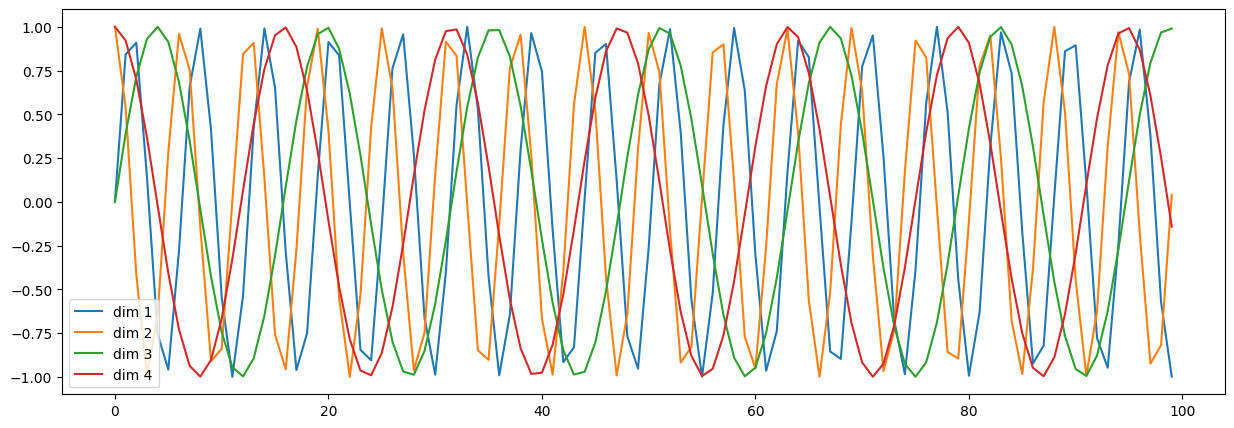

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 5))
plt.plot(np.arange(100), y[0, :, 0:4].data.numpy())
plt.legend(["dim %d" % p for p in [1, 2, 3, 4]])
plt.show()

В результате каждая позиция кодируется уникальным представлением. При этом представление позволяет легко находить слова на заданном расстоянии от исходного (у них будет одинаково значение сигнала по какой-то оси).

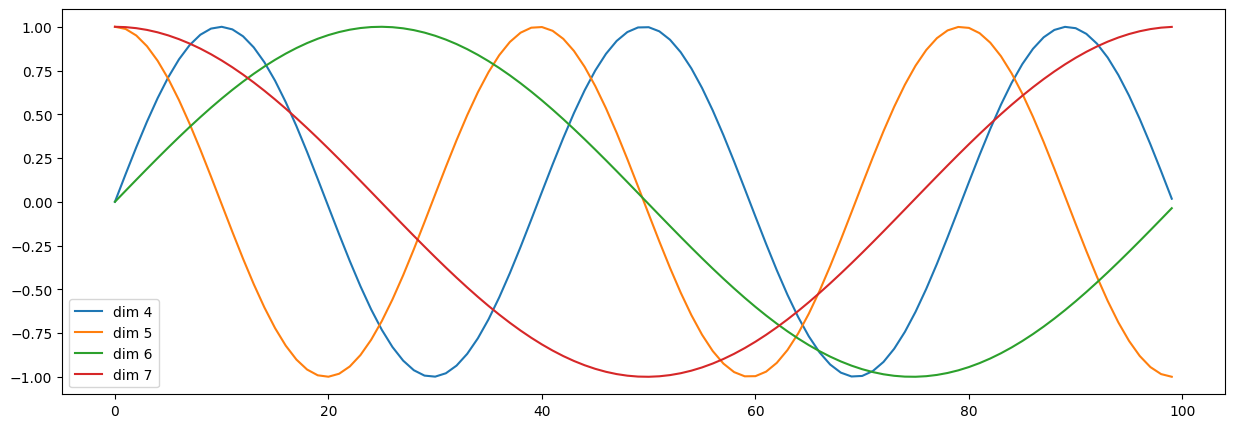

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(np.arange(100), y[0, :, 4:8].data.numpy())
plt.legend(["dim %d" % p for p in [4, 5, 6, 7]])
plt.show()

Это помогает трансформеру достаточно уникальным образом определять каждую позицию и понимать относительное расстояние между разными токенами.

## Архитектура трансформера-декодировщика

Авторегрессионный синтез последовательности:

$\large y_0 = \langle {BOS} \rangle$ — эмбеддинг символа начала.

Для всех $t = 1, 2, \dots$ выполняется следующая последовательность вычислений:

1. Маскирование "данных из будущего":

$\qquad \large h_t = y_{t-1} + p_t;$

$\qquad \large H_t = (h_1, \dots, h_t).$

2. Многомерное самовнимание:

$\qquad \large h'_t = LN \circ MH_j \circ Attn(\color{red}{W^j_q}h_t, \color{red}{W^j_k}H_t, \color{red}{W^j_v}H_t).$

3. Многомерное внимание на кодировку $Z$:

$\qquad \large h''_t = LN \circ MH_j \circ Attn(\color{red}{W^j_q}h'_t, \color{red}{W^j_k}Z, \color{red}{W^j_v}Z).$

4. Двухслойная полносвязная сеть:

$\qquad \large y_t = LN \circ FFN(h''_t).$

5. Линейный предсказывающий слой:

$\qquad \large p(\tilde w | t) SoftMax_{\tilde w}(\color{red}{W_y}y_t + b_y).$

Генерация $\tilde w_t = argmax(p(\tilde w | t))$ продолжается пока $\tilde w_t \neq \langle {EOS} \rangle$.


<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/transformer_decoder.png" width="350">

<em>Архитектура трансформера-декодировщика</em>

<em>Source: <a href="http://www.machinelearning.ru/wiki/images/1/19/Voron-ML-Attention-slides.pdf"> К.В. Воронцов, Машинное обучение: Обработка последовательностей и модели внимания</a></em>

### Masked Self-Attention Layer


Допустим,  у нас стоит проблема, что мы не должны видеть часть слов в предложении — например, при генерации текста (по текущим словам предсказать следующее). Например, хотим сгенерировать фразу "robot must obey orders" на основе только первого слова.

Если мы подадим в нейронную сеть во время обучения сразу все предложение, которое хотим генерировать, то у нас в первых словах будет "протекать" информация о предыдущих.

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/queries_keys_scores_before_softmax.png" width="800">

В этом случае мы можем просто на соответствующих местах матрицы $E$ поставить минус бесконечности. Тогда в эмбеддингах слов, которые не должны знать о каких-то словах, информации об этих словах не будет.

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/scores_before_softmax_apply_attention_mask_masked_scores_before_softmax.png" width="800">

В результате после SoftMax "лишняя" информация не будет использоваться при генерации ответа на query.

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/masked_scores_softmax_along_rows_scores.png" width="800">

<em>Source: <a href="https://jalammar.github.io/illustrated-gpt2/">The Illustrated GPT-2 (Visualizing Transformer Language Models)</a></em>

Благодаря этому трюку у нас получается обучать transfomer по-прежнему как простую single-pass нейросеть, а не "скатываться" в RNN, где у нас возникнут проблемы с градиентами и временем работы.

## Небольшая историческая справка

Далее часть текста основана на статье [GPT для чайников: от токенизации до файнтюнинга](https://habr.com/ru/articles/599673/).

Качественный скачок в решении NLP-задачи произошёл благодаря рекуррентным сетям. Затем появился механизм внимания — **attention**, который применялся в RNN и давал огромный прирост качества.

Далее статья _Attention Is All You Need_ показала, что attention отлично работет вовсе без RNN. В этой статье трансформер из кодировщика и декодировщика был обучен переводить текст, и делал это великолепно.

Затем произошёл раскол: в OpenAI решили сконцентироваться на декодерах, а в Google — на энкодерах. Так появились первые **GPT** и **BERT**.

**Так что же такое GPT?**
* Это нейронная сеть для генерации (продолжения) текста.

* Более строго — языковая модель, основанная на архитектуре трансформер и обученная в self-supervised режиме на огромном [корпусе](https://philology.by/about/yaskevich/corpus-linguistics-yaskevich) текстовых данных.

**Оригинальные статьи про поколения GPT:**
* [Improving Language Understanding by Generative Pre-Training (2018)](https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf)
* [Language Models are Unsupervised Multitask Learners (2019)](https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf)
* [Language Models are Few-Shot Learners (2020)](https://arxiv.org/pdf/2005.14165.pdf)

## Hugging Face

Для работы с GPT будем использовать предобученную модель. Лучший выбор для работы с трансформерами — библиотеки от **Hugging Face**: `transformers`, `tokenizers`, `datasets`.

Hugging Face занимается стандартизацией применения трансформеров, а также хранит наборы весов и датасеты для различных NLP-задач. Воспользуемся русскоязычной моделью ruGPT3 и дообучим её.



Установим библиотеку Transformers:

In [ ]:
!pip install -q transformers[torch]

Выберем необходимую модель. API для различных моделей одинаковый, для подмены модели достаточно изменить название модели `model_name`.

In [ ]:
import torch
import transformers
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from IPython.display import clear_output

transformers.logging.set_verbosity_error()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Loading and initialization of model and tokenizer
model_name = "sberbank-ai/rugpt3large_based_on_gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name).to(device)

clear_output()

## Языковое моделирование

**Языковое моделирование** — предсказание следующего слова (или части слова) с учётом предыдущего контекста.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/yandex_search.png" width="700"></center>

<center><em>Source: <a href="https://habr.com/ru/articles/599673/">GPT для чайников: от токенизации до файнтюнинга</a></em></center>

Для того, чтобы сгенерированное моделью продолжение текста было верным не только грамматически, но и семантически, модель должна хорошо понимать смысл изначального текста и, желательно, даже иметь знания о реальном мире.

Эти внутренние знания позволяют модели отвечать на вопросы, суммаризировать текст, создавать диалоговые системы и многое другое.

Например, если мы хотим при помощи языковой модели ответить на вопрос: **«Сколько будет 2+2?»**, то можем подать на вход модели следующий текст:\
`«Вопрос: Сколько будет 2+2? Ответ: … »`\
и естественным продолжением такого текста будет ответ на вопрос, поэтому модель допишет `«4»`

In [ ]:
text = "Вопрос: 'Сколько будет 2+2?'\nОтвет:"
input_ids = tokenizer.encode(text, return_tensors="pt").to(device)
out = model.generate(input_ids, do_sample=False, max_length=20, pad_token_id=20)

generated_text = list(map(tokenizer.decode, out))[0]

print(generated_text)

Вопрос: 'Сколько будет 2+2?'
Ответ: '2+2=4'


Похожим способом можно кратко пересказывать тексты, если в конце дописывать `«TL:DR»`, т.к. модель во время обучения запомнила, что после этих символов идёт краткое содержание. Подбор модификаций текста называется **«Prompt Engineering»**. Такая простая идея позволяет решать практически неограниченное количество задач. Именно поэтому многие считают GPT-3 подобием сильного искусственного интеллекта.

# Как работает GPT

## Токенизация

Один из ключевых этапов в обработке текста — **токенизация**. На этом этапе происходит разделение текста на отдельные единицы — предложения и слова. Затем создается словарь, в который заносятся уникальные лексемы, встретившиеся в корпусе или тексте. На этих этапах можно столкнуться с несколькими проблемами.

**Проблема 1. Размер словаря**

Самый простой способ токенизации — назначить каждому уникальному слову своё число. Но есть проблема: слов и их форм миллионы, и поэтому словарь таких слов получится чересчур большим, а это будет затруднять обучение модели.

Можно разбивать текст не на слова, а на отдельные буквы (char-level tokenization), тогда в словаре будет всего несколько десятков токенов, НО в таком случае уже сам текст после токенизации будет слишком длинным, а это тоже затрудняет обучение.

**Проблема 2. Богатая морфология**

"Нейросеть", "сетка", "сеть" являются разными словами, но имеют схожий смысл. Эту проблему классически всегда решал этап **стемминга** (удаление суффикса, приставки, окончания) или **лемматизации** (приведение слова к канонической форме).

**Проблема 3. Сложные слова**

Но все проблемы эти этапы не решают. В германских языках (в английском, немецком, шведском и т.д.) очень продуктивно образуются новые сложные слова. Значения таких слов выводятся из значения их элементов. Их можно создавать бесконечно долго, и большинство из них не зафиксировано в «бумажном» словаре.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/swedish_word_example.png" width="600"></center>

<center><em>Пример шведского названия гаечного ключа для колеса мотоцикла</a></em></center>

<center><em>Source: <a href="https://sysblok.ru/nlp/7250/">Как работает алгоритм токенизации текстов для нейросетей</a></em></center>

При работе с этими языками сложность также возникает на этапе составления словаря. При составлении словаря модели ориентируются на частотность (например, сохраняем слово, если оно встретилось чаще пяти раз), поэтому не будут запоминать такое длинное и сложное слово.

**Проблема 4: Границы слова**

Для нас, привыкших к языкам европейского типа, слово — это набор букв между пробелами и знаками препинания. Но в английском языке многие сложные слова пишутся раздельно, а в японском, наоборот, между словами вообще нет пробелов. Поэтому универсальный токенизатор создать было нелегко.

**Решение — Byte Pair Encoding**

Изначально алгоритм компрессии BPE позволяет моделям узнавать как можно больше слов при ограниченном объеме словаря.

1.   Слово = последовательность токенов
2.   Словарь = все токены
3.   Повторять, пока не достигли ограничения на размер словаря:

     Назначаем новым токеном объединение двух существующих токенов, которое
встречается чаще других пар в корпусе (встречаются вместе).

В применении BPE возможны разные варианты. Один из естественных – идём по всем токенам по убыванию частоты, находим соответствующую последовательность символов в корпусе, заменяем на токен.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/subword_tokenization.png" width = "500"></center>

<center><em>Source: <a href="https://alexanderdyakonov.wordpress.com/2019/11/29/токенизация-на-подслова-subword-tokenization/">Токенизация на подслова (Subword Tokenization)</a></em></center>

Этот же способ помогает решить **проблему** **OOV (out of vocabulary)**. В обучающей выборке может не быть слова *Unfriendly*, но поскольку **Unfriendly** = **Un** + **friend** + **ly**, мы можем рассчитывать, что сеть будет правильно обрабатывать / генерировать и слово целиком.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/token_unfriendly.png" width="600"></center>

<center><em>Source: <a href="https://www.thoughtvector.io/blog/subword-tokenization/">Subword Tokenization — Handling Misspellings and Multilingual Data</a></em></center>

Но даже это иногда не самый оптимальный выбор. Чтобы сжать словарь ещё сильнее, для обучения GPT OpenAI использовали **byte-level BPE** токенизацию. Эта модификация BPE работает не с текстом, а напрямую с его байтовым представлением. Использование такого трюка позволило сжать словарь до всего-лишь ~50k токенов при том, что с его помощью всё ещё можно выразить любое слово на любом языке мира (и даже эмодзи).

In [ ]:
import locale

locale.getpreferredencoding = lambda: "UTF-8"
!pip install -q transformers[torch]

In [ ]:
import torch
import transformers
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from IPython.display import clear_output

transformers.logging.set_verbosity_error()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Loading and initialization of model and tokenizer
model_name_or_path = "sberbank-ai/rugpt3large_based_on_gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name_or_path)
model = GPT2LMHeadModel.from_pretrained(model_name_or_path).to(device)

clear_output()

**Пример токенизации**

In [ ]:
text = "Нейронные сети - это очень просто и увлекательно"
tokens = tokenizer.encode(text, add_special_tokens=False)

decoded_tokens = [tokenizer.decode([token]) for token in tokens]

print("Original text:", text)
print("Tokens: ", tokens)
print("Decoded tokens: ", decoded_tokens)

Original text: Нейронные сети - это очень просто и увлекательно
Tokens:  [682, 355, 1368, 448, 5324, 376, 481, 939, 1139, 289, 13904, 1245]
Decoded tokens:  ['Н', 'ей', 'рон', 'ные', ' сети', ' -', ' это', ' очень', ' просто', ' и', ' увлека', 'тельно']


Byte-level токенизатор **не гарантирует**, что для любого токена найдется **соответствующий** символ или слово. Некоторые **токены** **существуют** только **в комбинациях**. Так, представленные токены не декодируются по отдельности.

In [ ]:
print(tokenizer.decode([167]))
print(tokenizer.decode([245]))
print(tokenizer.decode([256]))

print(tokenizer.decode([167, 245, 256]))

�
�
�
撝


## Архитектура GPT

При генерации продолжения текста с помощью GPT происходит следующее:

1. Входной текст токенизируется в последовательность чисел (токенов).
2. Список токенов проходит через Embedding layer (линейный слой) и преобразуется в список эмбеддингов.
3. К каждому эмбеддингу прибавляется **positional embedding**.
4. Список эмбеддингов проходит через несколько одинаковых блоков (Transformer Decoder Block).
5. После того, как список эмбеддингов пройдёт через последний блок, эмбеддинг, соответствующий последнему токену, матрично умножается на всё тот же входной, но уже транспонированный Embedding Layer, и после применения SoftMax получается распределение вероятностей следующего токена.
6. Из этого распределения выбирается следующий токен (например, с помощью argmax)
7. Полученный токен добавляется к входному списку токенов, шаги 1-6 повторяются

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/gpt3.gif" width="800"></center>

<center><em>Source: <a href="https://jalammar.github.io/how-gpt3-works-visualizations-animations/">How GPT3 Works — Visualizations and Animations</a></em></center>

## Positional Encoding

В отличие от рекуррентных сетей, архитектура трансформера не чувствительна к порядку входных токенов, то есть при перемешевании слов местами выход будет получаться одинаковым (permutation invarience).

Позиционное кодирование описывает позицию объекта в последовательности так,  что каждой позиции соответствует уникальное представление.

**Почему не используется одно число, например значение индекса?**

Для длинных последовательностей индексы могут сильно увеличиваться по величине. Если вы нормализуете значение индекса так, чтобы оно лежало между $0$ и $1$, это может создать проблемы для последовательностей переменной длины, поскольку они будут нормализованы по-разному.

Поэтому в GPT используется кодирование позиции в виде вектора, который прибавляется к эмбеддингу токена. Эти позиционные эмбеддинги можно как зафиксировать заранее (так делается в оригинальном трансформере, см. пример на картинке), так и обучать, как в случае GPT.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/pos_encoding_visual.png" width="800"></center>

<center><em>Позиционные эмбеддинги оригинального трансформера</em></center>

<center><em>Source: <a href="https://habr.com/ru/articles/599673/">GPT для чайников: от токенизации до файнтюнинга</a></em></center>

Предположим, у вас есть входная последовательность длины $L$, и требуется задать положение $k$-того объекта в этой последовательности. Позиционное кодирование задается функциями синуса и косинуса различной частоты:

$$P(k, 2i) = sin (\frac{k}{2^{2i/d}})$$

$$P(k, 2i+1) = cos (\frac{k}{2^{2i/d}})$$

где $k$ — позиция объекта в последовательности, $\displaystyle 0\leq k< \frac{L}{2}$,

$d$ — размерность выходного пространства эмбеддингов,

$P(k,j)$ — функция, которая переводит позицию $k$ в индекс $(k,j)$ позиционной матрицы,

$n$ — константа, обычно равно $10 000$ согласно статье *Attention is all You Need*,

$i$ — индекс колонки, $0 \leq i < d/2$, одинаково для синуса и для косинуса.



## Transformer Decoder Block

Основной блок GPT состоит из слоёв self-attention, нормализации, feed-forward и residual connections.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/decoder_block.png" width="500"></center>

<center><em>Source: <a href="https://ai-news.ru/2019/06/obobshennye_yazykovye_modeli.html">Обобщенные Языковые Модели</a></em></center>


## Методы Генерации текста

Языковая модель генерирует распределение вероятностей следующего токена. Однако способы генерации текста могут отличаться. Далее разберём, какие варианты бывают.

Для наглядности применим основные методы для продолжения следующего текста  \
`'Определение: "Нейронная сеть" — это'`

In [ ]:
text = 'Определение: "Нейронная сеть" - это'
input_ids = tokenizer.encode(text, return_tensors="pt").to(device)

### Greedy Search

Очевидный вариант — ArgMax-генерация (жадный поиск). Выбирается максимально вероятный токен.

При таком способе мы не получим разнообразного текста на один и тот же запрос, и, что ещё хуже, генерация может застревать в локальных минимумах и выдавать повторяющиеся фрагменты, например `the the the the ...`.

In [ ]:
# ArgMax is defaulf behaviour
out = model.generate(input_ids, do_sample=False, max_length=30, pad_token_id=30)

generated_text = list(map(tokenizer.decode, out))[0]
print()
print(generated_text)


Определение: "Нейронная сеть" - это компьютерная программа, которая позволяет создавать и анализировать нейронные сети. Нейронные сети


### Beam Search
Несколько более сложный и качественный способ сэмплирования — **beam search**. Каждый раз мы выбираем не один самый вероятный токен, а сразу несколько (`beam-size`), и дальше продолжаем поиск для каждого из выбранных токенов.

Таким образом создаётся **граф** со сгенерированными **вариантами предложений**. Далее выбирается предложение с наибольшей **perplexity** (уверенностью модели в реалистичности текста).

Обычно это приводит к высокой связности (когерентности) текста, но при этом к сухости и скучности текста. Также это не решает полностью проблему с повторениями кусочков текста.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/beam_search.png" width="500"></center>

<center><em>Source: <a href="https://habr.com/ru/articles/599673/">GPT для чайников: от токенизации до файнтюнинга</a></em></center>



In [ ]:
# Generation with beam-search
out = model.generate(input_ids, do_sample=False, num_beams=5, max_length=30, pad_token_id=30)

generated_text = list(map(tokenizer.decode, out))[0]
print()
print(generated_text)


Определение: "Нейронная сеть" - это компьютерная сеть, состоящая из компьютеров, соединенных друг с другом. Нейронная


### Сэмплирование с Температурой

Чтобы добавить тексту непредсказуемости и человечности, можно использовать вероятностное сэмплирование с температурой. Будет использоваться не самый вероятный токен, а случайный, с учётом распределения вероятностей.

Параметр температуры позволяет контролировать степень случайности. При нулевой температуре метод совпадает с жадным сэмплированием, при  большой температуре токены будут выбираться полностью случайно. Обычно хорошо работает температура в диапазоне `0.8–2.0`.

Формула модификации распределения вероятностей очень похожа на формулу распределения Больцмана: чем выше температура системы, тем больше "размазывается" распределение вероятностей её возможных состояний, отсюда слово "температура".

$$p=softmax(log(p)/t)$$

Стоит отметить, что случайная природа генерации будет иногда приводить к полностью некорректным результатам.

In [ ]:
out = model.generate(input_ids, do_sample=True, temperature=1.3, max_length=30, pad_token_id=30)

generated_text = list(map(tokenizer.decode, out))[0]
print()
print(generated_text)


Определение: "Нейронная сеть" - это относительно молодая наука, получившая толчок от научных экспериментов.
Нейронная сеть может


### Сэмплирование с Ограничением Маловероятных Токенов (Nucleus sampling)

Можно ввести запрет на семплирование наименее вероятных токенов:

* `top-k` зануляет все вероятности, кроме $k$ наибольших;

* `top-p` оставляет минимальный набор токенов, причём сумма их вероятностей будет не больше $p$.

`top-p` ограничение называют **Nucleus Sampling**.

In [ ]:
out = model.generate(
    input_ids,
    do_sample=True,
    temperature=1.3,
    top_k=20,
    top_p=0.8,
    max_length=30,
    pad_token_id=30
)

generated_text = list(map(tokenizer.decode, out))[0]
print()
print(generated_text)


Определение: "Нейронная сеть" - это сеть нейронов, которые могут существовать в качестве автономных систем. В случае, когда они


## Сравнение поколений GPT


### GPT-1

**GPT — Generative Pretraining of Transformers**, состоящая всего из 12 слоёв и обученная на 7000 книгах. Хотя длинные тексты генерировались неважно, при файнтюнинге на узкоспециализированные задачи отрабатывала лучше SOTA.

Основным новшеством было доказательство того, что предобучение без учителя языковой модели позволяет добиться отличных результатов после дальшейшего файнтюнинга.

Максимальный размер контекста — 512 токенов.

### GPT-2

Вскоре после GPT-1 появился BERT, побивший её результаты. После чего OpenAI **увеличили количество слоёв в 10 раз** и довели **количество парамеров** до **1.5B**. Модель была дообучена на **8 миллионов сайтов**, суммарно на 40 Гб текста. Архитектрурно это та же модель с перемещёнными слоями нормализации.

GPT-2 научилась писать длинные связные тексты и даже решать при помощи prompt engineering множество новых задач.

Максимальный размер контекста — 1024 токенов

### GPT-3

Модель **увеличилась ещё в 10 раз (175B параметров)**, объём датасета — 570 Гб текста. Архитектурно та же, изменения коснулись оптимизации attention.

Теперь модель может писать рабочий программный код [(CODEX)](https://openai.com/blog/openai-codex/) и решать много других почти сверхъестественных задач ([воскрешать мёртвых ](https://futurism.com/openai-dead-fiancee)).

Максимальный размер контекста — 2048 токенов.

# Файнтюнинг

Воспользуемся моделью меньшего размера, чтобы она поместилась на GPU.

In [ ]:
!pip install -q transformers[torch]

In [ ]:
import torch
import transformers
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from IPython.display import clear_output

transformers.logging.set_verbosity_error()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_name = "sberbank-ai/rugpt3small_based_on_gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name).to(device)

clear_output()

## Как происходит обучение

Обучающий текст нарезается на случайные блоки, которые составляются в последовательности из 1024 (2048 у GPT-3) токенов, разделяясь специальным `<|endoftext|>` символом. Во время обучения модель учится предсказывать (классифицировать) каждый токен в последовательности один за другим при помощи Cross-Entropy Loss.

Так как входная последовательность всегда заполнена до конца, padding не используется. Но во время инференса длина входного текста может быть произвольной, поэтому надо явно указывать, чем паддить оставшиеся позиции. По дефолту использутеся тот же `<|endoftext|>`.

В отдельных версиях GPT вышесказанное может модифицироваться. Например, в ruGPT3 гораздо больше специальных токенов: `<s\>`, `<s>`, `<pad>`, `<unk>`

## Обучающие данные
Будем учить GPT генерировать стихи Маяковского. В качестве обучающих данных возьмём всего лишь один стих.

In [ ]:
text = """Дым табачный воздух выел.
Комната —
глава в крученыховском аде.
Вспомни —
за этим окном
впервые
руки твои, исступленный, гладил.
Сегодня сидишь вот,
сердце в железе.
День еще —
выгонишь,
может быть, изругав.
В мутной передней долго не влезет
сломанная дрожью рука в рукав.
Выбегу,
тело в улицу брошу я.
Дикий,
обезумлюсь,
отчаяньем иссеча́сь.
Не надо этого,
дорогая,
хорошая,
дай простимся сейчас.
Все равно
любовь моя —
тяжкая гиря ведь —
висит на тебе,
куда ни бежала б.
Дай в последнем крике выреветь
горечь обиженных жалоб.
Если быка трудом уморят —
он уйдет,
разляжется в холодных водах.
Кроме любви твоей,
мне
нету моря,
а у любви твоей и плачем не вымолишь отдых.
Захочет покоя уставший слон —
царственный ляжет в опожаренном песке.
Кроме любви твоей,
мне
нету солнца,
а я и не знаю, где ты и с кем.
Если б так поэта измучила,
он
любимую на деньги б и славу выменял,
а мне
ни один не радостен звон,
кроме звона твоего любимого имени.
И в пролет не брошусь,
и не выпью яда,
и курок не смогу над виском нажать.
Надо мною,
кроме твоего взгляда,
не властно лезвие ни одного ножа.
Завтра забудешь,
что тебя короновал,
что душу цветущую любовью выжег,
и су́етных дней взметенный карнавал
растреплет страницы моих книжек…
Слов моих сухие листья ли
заставят остановиться,
жадно дыша?
Дай хоть
последней нежностью выстелить
твой уходящий шаг.."""

В библиотеке transformers есть готовые инструменты для подготовки датасета и даталодера. На вход нужен всего лишь один `.txt` файл с обучающим текстом.

In [ ]:
# Save text train data as .txt file
train_path = "train_dataset.txt"
with open(train_path, mode="w", encoding="utf-8") as f:
    f.write(text)

In [ ]:
from transformers import TextDataset, DataCollatorForLanguageModeling
from warnings import simplefilter

simplefilter("ignore", category=FutureWarning)

# Creating Dataset
train_dataset = TextDataset(tokenizer=tokenizer, file_path=train_path, block_size=64)

# Сreating DataLoader (crop the text into optimal length pieces)
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

## Training
Для файнтюнинга нам необходим объект класса Trainer, который сделает всю работу за нас. Далее нужно будет всего лишь запустить `trainer.train()`.

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./finetuned",  # The output directory
    overwrite_output_dir=True,  # overwrite the content of the output directory
    num_train_epochs=200,  # number of training epochs
    per_device_train_batch_size=32,  # batch size for training
    per_device_eval_batch_size=32,  # batch size for evaluation
    warmup_steps=10,  # number of warmup steps for learning rate scheduler
    gradient_accumulation_steps=16,  # to make "virtual" batch size larger
)


trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    optimizers=(
        torch.optim.AdamW(model.parameters(), lr=1e-5),
        None,
    ),  # Optimizer and learnig rate scheduler
)

In [ ]:
trainer.train()

{'train_runtime': 32.43, 'train_samples_per_second': 43.17, 'train_steps_per_second': 6.167, 'train_loss': 0.040189566612243655, 'epoch': 200.0}


TrainOutput(global_step=200, training_loss=0.040189566612243655, metrics={'train_runtime': 32.43, 'train_samples_per_second': 43.17, 'train_steps_per_second': 6.167, 'train_loss': 0.040189566612243655, 'epoch': 200.0})

## Результат файнтюнинга
Готово! Теперь давайте посмотрим, что же сочинит GPT в стиле Маяковского, если на вход подать такую строчку:

"Учим нейросеть за нейросетью!"

In [ ]:
# Probability sampling with limit example
text = "Как же сложно учить матанализ!\n"
input_ids = tokenizer.encode(text, return_tensors="pt").to(device)
model.eval()
with torch.no_grad():
    out = model.generate(
        input_ids,
        do_sample=True,
        num_beams=2,
        temperature=1.5,
        top_p=0.9,
        max_length=100,
        pad_token_id=512
    )

generated_text = list(map(tokenizer.decode, out))[0]
print()
print(generated_text)


Как же сложно учить матанализ!
Если быка трудом уморят —
он уйдет,
разляжется в холодных водах.
Кроме любви твоей,
мне
нету моря,
а у любви твоей и плачем не вымолишь отдых.
Захочет покоя уставший слон —
царственный ляжет на трон.
Захочет отдыха уставший слон —
царственный ляжет на трон.
Захочет отдыха уставший слон —
царственный


**Полезные ссылки**
1. [GPT в картинках](https://habr.com/ru/post/490842/) — очень подробный разбор внутренней архитектуры GPT-2 с акцентом на иллюстрации.
2. [Трансформер в картинках](https://habr.com/ru/post/486358/) — очень подробный разбор архитектуры Transformer с акцентом на иллюстрации.
3. [Tokenizers tutorial](https://huggingface.co/docs/transformers/tokenizer_summary) — краткий разбор всех типов токенизаторов от Huggingface с примерами.
4. [Как генерировать текст](https://huggingface.co/blog/how-to-generate) — обзор способов сэмплирования текста с помощью языковых моделей (бимсёрч и тд).
5. [Attention is All You Need](https://arxiv.org/pdf/1706.03762.pdf) — оригинальная статья про первый трансформер.
6. [GPT-1](https://openai.com/blog/language-unsupervised/) — статья в блоге OpenAI про GPT-1.
7. [GPT-2](https://openai.com/blog/better-language-models/) — статья в блоге OpenAI про GPT-2.
8. [GPT-3](https://openai.com/blog/gpt-3-apps/) — статья в блоге OpenAI про GPT-3.
9. [WebGPT](https://openai.com/blog/improving-factual-accuracy/) — статья в блоге OpenAI про GPT-3, обученную гуглить.
10. [Codex](https://openai.com/blog/openai-codex/) — статья в блоге OpenAI про GPT-3, обученную писать код.

# Примеры применений Transformer


Непосредственное применение разобранной архитектуры Encoder-Decoder для перевода текста

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/transformer_text_translation_example.png" width="800"></center>

<center><em>Source: <a href="https://jalammar.github.io/illustrated-gpt2/">The Illustrated GPT-2 (Visualizing Transformer Language Models)</a></em></center>

[The Illustrated BERT, ELMo, and co. (How NLP Cracked Transfer Learning)](https://jalammar.github.io/illustrated-bert/)

## BERT (Bidirectional Encoder Representations from Transformers )

В случае BERT используется только Encoder часть

Это нейросеть, предобученная на огромном корпусе английского текста.

Перед ней ставили следующие задачи:

**Задача 1**

На вход дается предложение. В нем выбрано $15\%$ токенов, из которых:
1. $80\%$ замаскированы;
2. $10\%$ заменены случайным;
3. $10\%$ оставлены без изменений.

**Задача 2**

На вход даются два предложения. Необходимо определить, идет ли второе непосредственно за первым в тексте или нет (просто случайное предложение из корпуса).

В результате на вход подается все в таком виде:

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/bert.jpg" width="800"></center>

<center><em>Source: <a href="https://arxiv.org/pdf/1810.04805.pdf">BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding</a></em></center>

$CLS$ токен нужен для того, чтобы нейросети было, куда класть информацию обо всем предложении в целом.

$SEP$ нужен просто для того, чтобы разделять два предложения (если мы подаем их два) и для того, чтобы отмечать окончание. Использование $SEP$ с двумя целями позволяет подавать в уже обученную нейросеть только одно предложение.




### Masked Language Model

Для первой задачи используем Encoder-Decoder

То есть у нас есть **Encoder**, который получает богатые представления, и добавленный только на время обучения **Decoder** (не attention, просто MLP).

Именно Decoder отвечает за то, чтобы предсказывать пропущенные/замененные токены. Ошибка считается только по тем $15\%$ токенов, для которых могли произойти изменения, а не по всему предложению.

Как гарантируется, что модель не заменяет имевшиеся в предложение слова на другие?

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/masked_language_model.png" width="800"></center>


### Next Sentence Prediction

Для второй задачи — Classifier.

При этом на вход ему подается только сам CLS токен


<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/next_sentence_prediction.png" width="800"></center>


Обучаем модель на обеих задачах одновременно.


### Transfer learning с BERT

Обученную таким образом модель (оставляем только encoder), можно использовать для огромного числа других задач


<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/transfer_learning_with_bert.jpg" width="800"></center>

<center><em>Source: <a href="https://arxiv.org/pdf/1810.04805.pdf">BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding</a></em></center>



### Zero-shot learning

Более того, есть BERT, тренированная на большом числе разных языков.

Это позволяет, например, сравнивать предложения из разных языков, хотя мы этому даже не учились. Поиграть можно [здесь](https://colab.research.google.com/github/deepmipt/dp_tutorials/blob/master/Tutorial_2_DeepPavlov_BERT_transfer_learning.ipynb#scrollTo=S1iqGcxUINyU). Веса будут грузиться ДОЛГО

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/zero_shot_learning_bert.png" width="800"></center>

<center><em>Source: <a href="https://arxiv.org/pdf/1810.04805.pdf">BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding</a></em></center>

### Специализированные аналоги BERT

Более того, можно тренировать BERT под строго определенные задачи — например, анализ текстов научных статей.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/bert_specialized_analogs.png" width="800"></center>

## GPT (Generative Pretrained Transformer )

В случае GPT используется только Decoder часть. Но теперь во всех частях используются masked attention.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/generative_pretrained_transformer_gpt.png" width="800"></center>

<center><em>Source: <a href="https://jalammar.github.io/illustrated-gpt2/">The Illustrated GPT-2 (Visualizing Transformer Language Models)</a></em></center>

Это нейросеть обширно используется для задачи генерации текста.

Работает она следующим образом.

На вход подается "затравка" — какой-то текст (набор токенов). Можно подать просто SOS (Start of sentence) токен, обозначающий начало предложения и больше не несущий никакой дополнительной информации.

Сеть генерирует следующий токен. Добавляем его к входной последовательности и подаем этот удлиненный текст нейросети как вход.

Делаем так до тех пор, пока не надоест/не достигнем максимальной длины предложения/не встретим символ окончания генерации.

<center><img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/gpt2_autoregression.gif" width="800"></center>

<center><em>Source: <a href="https://jalammar.github.io/illustrated-gpt2/">The Illustrated GPT-2 (Visualizing Transformer Language Models)</a></em></center>

Как ее обучали? На самом деле, тоже unsupervised learning. Но теперь перед моделью ставится задача предсказывать по предыдущим словам в предложении текущее.

Понятно, что такую модель можно сразу же идти и использовать для генерации, для которой она и училась.

Однако затем ее можно применять для многих других задач (опять же, путем transfer learning):

1. Классификации — подаем сразу все предложение, полученное представление используем для предсказания.

2. Entailment (Определение логического следования) — даем изначальные данные, гипотезу, надо оценить, следует ли гипотеза из данных.

3. Similarity — можем оценивать похожесть предложений. Так как это мы определяем порядок предложений, то, чтобы избежать неявной зависимости от порядка пропускания предложений, будем использовать результат пропускания через нейросеть обоих возможных порядков.

4. Выбор варианта ответа на вопросы — может обучить нейросеть отвечать на вопросы с множественным выбором.

<img src ="https://edunet.kea.su/repo/EduNet-content/L08/out/gpt_classification_entailment_similarity.png" width="1000">

Также можно научить нейросеть отвечать на вопросы и т.д.

Таким образом, мы можем даже текст переводить с помощью GPT.

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/decoder_only_transformer_translation.png" width="800">

<em>Source: <a href="https://jalammar.github.io/illustrated-gpt2/">The Illustrated GPT-2 (Visualizing Transformer Language Models)</a></em>

Просто подаем предложение с токеном в конце, определяющим, на какой язык переводим

По аналогичной схеме можем научить нашу сеть [делать summary текста](https://arxiv.org/abs/2109.10862)

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/L08/decoder_only_summarization.png" width="800">

<em>Source: <a href="https://jalammar.github.io/illustrated-gpt2/">The Illustrated GPT-2 (Visualizing Transformer Language Models)</a></em>

[Здесь](https://russiannlp.github.io/rugpt-demo/) можно поиграть с open-source русскоязычным аналогом GPT-3 от Сбера.

А [здесь](https://colab.research.google.com/github/kingoflolz/mesh-transformer-jax/blob/master/colab_demo.ipynb#scrollTo=e-NKauYvgTNG) — поиграть с GPT-J-6B, но уже в Collab

<font size = "6">Хорошие источники</font>

[Про трансформеры](https://www.notion.so/Transformers-969f4b27c48147778c1e2dbda0c83ce0)

[Аннотированный трансформер](http://nlp.seas.harvard.edu/2018/04/03/attention.html)

[Код множества моделей с красивыми комментариями](https://nn.labml.ai/)

[Зоопарк BERT](https://ai.plainenglish.io/so-how-is-bert-different-ad43a42cab48)

[Transformers in computer vision: ViT architectures, tips, tricks and improvements](https://theaisummer.com/transformers-computer-vision/)

[Illustrated transformer](https://jalammar.github.io/illustrated-transformer/)

[Illustrated GPT-2](https://jalammar.github.io/illustrated-gpt2/)

[Open-source реализация GPT-3](https://arankomatsuzaki.wordpress.com/2021/06/04/gpt-j/)

[Transformer для русского языка](https://github.com/vlarine/transformers-ru)

[NLP Course for you](https://lena-voita.github.io/nlp_course.html)

[Курс по NLP от ШАД](https://github.com/yandexdataschool/nlp_course)